# ABCD Organization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
import os
import bnlearn as bn #d3blocks==1.4.9; pandas  = 1.5.3

# enable loading functions from within 'src' from 'notebooks'
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    print('yes')
    sys.path.append(module_path)

# Define csv file path 
current_dir = os.getcwd()
print("Current Path:",current_dir)
#csv_file_path = module_path + '\\TAN_Project\Data\\ABCD\\ABCD\\mh_y_ksads_ss.csv'

#import prediction_utilities as pred_utils
#import src.features.build_features as feat
import src.Functions.prediction_utilities_JP as pred_utils
import src.Functions.preprocessing_utilities as preprocess_utils
#from src.functions.results_functions import roc_curve_plotting, pr_curve_plotting, get_metrics_table, get_full_feature_results

#%autosave 120

yes
Current Path: d:\OHSU\TAN_Project\ABCD_TAN\Scripts


In [2]:
# List all csvs in the folder
import os

# Specify the directory path
folder_path = "D:\OHSU\TAN_Project\Data\ABCD\ABCD"

# List all CSV files in the directory
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
csv_files

['abcd_p_demo.csv',
 'ce_p_fes.csv',
 'ce_p_pm.csv',
 'ce_y_srpf.csv',
 'led_l_adi.csv',
 'led_l_coi.csv',
 'led_l_leadrisk.csv',
 'led_l_no2.csv',
 'led_l_parks.csv',
 'led_l_pm25.csv',
 'led_l_prenatal.csv',
 'mh_p_asr.csv',
 'mh_p_cbcl.csv',
 'mh_p_eatq.csv',
 'mh_p_fhx.csv',
 'mh_p_ksads_adhd.csv',
 'mh_p_ksads_ago.csv',
 'mh_p_ksads_asd.csv',
 'mh_p_ksads_bg.csv',
 'mh_p_ksads_bp.csv',
 'mh_p_ksads_cd.csv',
 'mh_p_ksads_dep.csv',
 'mh_p_ksads_dmdd.csv',
 'mh_p_ksads_ed.csv',
 'mh_p_ksads_gad.csv',
 'mh_p_ksads_hi.csv',
 'mh_p_ksads_ocd.csv',
 'mh_p_ksads_odd.csv',
 'mh_p_ksads_pd.csv',
 'mh_p_ksads_phb.csv',
 'mh_p_ksads_psy.csv',
 'mh_p_ksads_ptsd.csv',
 'mh_p_ksads_sad.csv',
 'mh_p_ksads_sep.csv',
 'mh_p_ksads_si.csv',
 'mh_p_ksads_slp.csv',
 'mh_p_ksads_ss.csv',
 'mh_t_bpm.csv',
 'mh_y_ksads_bg.csv',
 'mh_y_ksads_bip.csv',
 'mh_y_ksads_cd.csv',
 'mh_y_ksads_dep.csv',
 'mh_y_ksads_dmdd.csv',
 'mh_y_ksads_ed.csv',
 'mh_y_ksads_gad.csv',
 'mh_y_ksads_sad.csv',
 'mh_y_ksads_si.csv'

In [3]:
csv_file_path = folder_path + '\\' + 'refined_dict.csv'

redefined_df = pd.read_csv(csv_file_path)

In [4]:
redefined_tables = redefined_df["table_name"].unique()

redefined_var = {}
for table in redefined_tables: 
    df = redefined_df[redefined_df["table_name"] == table]
    redefined_var[table] = df["varname"].values
redefined_var

{'abcd_p_demo': array(['acs_raked_propensity_score', 'demo_brthdat_v2',
        'demo_comb_income_v2', 'demo_ed_v2', 'demo_ethn2_v2',
        'demo_prnt_ed_v2', 'demo_prnt_empl_time', 'demo_prnt_marital_v2',
        'race_ethnicity'], dtype=object),
 'gish_p_gi': array(['demo_gender_id_v2', 'demo_sex_v2'], dtype=object),
 'ph_p_dhx': array(['birth_weight_lbs', 'birth_weight_oz', 'devhx_9_tobacco',
        'devhx_18_p', 'devhx_4_p', 'devhx_3_p'], dtype=object),
 'ce_p_fes': array(['fam_enviro1_p', 'fam_enviro2r_p', 'fam_enviro3_p',
        'fam_enviro4r_p', 'fam_enviro5_p', 'fam_enviro6_p',
        'fam_enviro7r_p', 'fam_enviro8_p', 'fam_enviro9r_p', 'fes_p_ss_fc',
        'fes_p_ss_fc_pr'], dtype=object),
 'ce_y_srpf': array(['school_10_y', 'school_12_y', 'school_15_y', 'school_17_y',
        'school_2_y', 'school_3_y', 'school_4_y', 'school_5_y',
        'school_6_y', 'school_7_y', 'school_8_y', 'school_9_y',
        'srpf_y_ss_dfs', 'srpf_y_ss_iiss', 'srpf_y_ss_ses'], dtype=object),


In [5]:
folder_path

'D:\\OHSU\\TAN_Project\\Data\\ABCD\\ABCD'

## Load csv files

In [6]:
filenumber = 0
csv_file_path = folder_path + '\\' + csv_files[filenumber]
print(csv_file_path)

D:\OHSU\TAN_Project\Data\ABCD\ABCD\abcd_p_demo.csv


In [7]:
full_df = pd.read_csv(csv_file_path)
full_df

src_subject_id                 eventname  \
0      NDAR_INV003RTV85     baseline_year_1_arm_1   
1      NDAR_INV003RTV85  1_year_follow_up_y_arm_1   
2      NDAR_INV003RTV85  2_year_follow_up_y_arm_1   
3      NDAR_INV003RTV85  3_year_follow_up_y_arm_1   
4      NDAR_INV005V6D2C     baseline_year_1_arm_1   
...                 ...                       ...   
48802  NDAR_INVZZZP87KR     baseline_year_1_arm_1   
48803  NDAR_INVZZZP87KR  1_year_follow_up_y_arm_1   
48804  NDAR_INVZZZP87KR  2_year_follow_up_y_arm_1   
48805  NDAR_INVZZZP87KR  3_year_follow_up_y_arm_1   
48806  NDAR_INVZZZP87KR  4_year_follow_up_y_arm_1   

       demoi_p_select_language___1  demo_prim  demo_brthdat_v2  demo_ed_v2  \
0                                0        1.0             10.0         5.0   
1                                0        NaN              NaN         NaN   
2                                0        NaN              NaN         NaN   
3                                0        NaN              NaN         NaN   
4                                1        1.0             10.0         4.0   
...                            ...        ...              ...         ...   
48802                            0        1.0             10.0         5.0   
48803                            0        NaN              NaN         NaN   
48804                            0        NaN              NaN         NaN   
48805                            0        NaN              NaN         NaN   
48806                            0        NaN              NaN         NaN   

       demo_adopt_agex_v2  demo_adopt_agex_v2_bl_dk  demo_sex_v2  \
0                     NaN                       NaN          2.0   
1                     NaN                       NaN          NaN   
2                     NaN                       NaN          NaN   
3                     NaN                       NaN          NaN   
4                     NaN                       NaN          2.0   
...                   ...                       ...          ...   
48802                 NaN                       NaN          2.0   
48803                 NaN                       NaN          NaN   
48804                 NaN                       NaN          NaN   
48805                 NaN                       NaN          NaN   
48806                 NaN                       NaN          NaN   

       demo_gender_id_v2  ...  demo_nat_lang_3_yrs_other_p_14  \
0                    2.0  ...                             NaN   
1                    NaN  ...                             NaN   
2                    NaN  ...                             NaN   
3                    NaN  ...                             NaN   
4                    2.0  ...                             NaN   
...                  ...  ...                             ...   
48802                2.0  ...                             NaN   
48803                NaN  ...                             NaN   
48804                NaN  ...                             NaN   
48805                NaN  ...                             NaN   
48806                NaN  ...                             NaN   

       demo_nat_lang_3_p  demo_nat_lang_3_yrs_eng_p___1  \
0                    NaN                            NaN   
1                    NaN                            NaN   
2                    NaN                            NaN   
3                    0.0                            NaN   
4                    NaN                            NaN   
...                  ...                            ...   
48802                NaN                            NaN   
48803                NaN                            NaN   
48804                NaN                            NaN   
48805                0.0                            NaN   
48806                0.0                            NaN   

       demo_nat_lang_3_yrs_eng_p___2  demo_nat_lang_3_yrs_eng_p___3  \
0                                NaN                     

In [8]:
# Get all variable names
key2 = list(redefined_var.keys())

if csv_file_path[35:-4] in key2:
    print("yes")
    variables = ["eventname"] + list(redefined_var[csv_file_path[35:-4]])
    full_df = full_df[variables]

print(full_df.shape)
print(full_df.columns)

yes
(48807, 10)
Index(['eventname', 'acs_raked_propensity_score', 'demo_brthdat_v2',
       'demo_comb_income_v2', 'demo_ed_v2', 'demo_ethn2_v2', 'demo_prnt_ed_v2',
       'demo_prnt_empl_time', 'demo_prnt_marital_v2', 'race_ethnicity'],
      dtype='object')


In [9]:
# Find all columns with strings
columns_with_strings = full_df.select_dtypes(include=['object']).columns.tolist()
print(columns_with_strings)

['eventname']


In [10]:
drop = columns_with_strings.copy()
drop.remove("eventname")
print(drop)

[]


In [11]:
var_df = full_df.drop(columns = drop)
var_df

eventname  acs_raked_propensity_score  demo_brthdat_v2  \
0         baseline_year_1_arm_1                  466.092707             10.0   
1      1_year_follow_up_y_arm_1                  533.381820              NaN   
2      2_year_follow_up_y_arm_1                         NaN              NaN   
3      3_year_follow_up_y_arm_1                         NaN              NaN   
4         baseline_year_1_arm_1                  520.488325             10.0   
...                         ...                         ...              ...   
48802     baseline_year_1_arm_1                  835.604891             10.0   
48803  1_year_follow_up_y_arm_1                  842.080358              NaN   
48804  2_year_follow_up_y_arm_1                         NaN              NaN   
48805  3_year_follow_up_y_arm_1                         NaN              NaN   
48806  4_year_follow_up_y_arm_1                         NaN              NaN   

       demo_comb_income_v2  demo_ed_v2  demo_ethn2_v2  demo_prnt_ed_v2  \
0                      8.0         5.0            NaN             13.0   
1                      NaN         NaN            NaN              NaN   
2                      NaN         NaN            NaN              NaN   
3                      NaN         NaN            NaN              NaN   
4                    999.0         4.0           14.0              6.0   
...                    ...         ...            ...              ...   
48802                  7.0         5.0            NaN             17.0   
48803                  NaN         NaN            NaN              NaN   
48804                  NaN         NaN            NaN              NaN   
48805                  NaN         NaN            NaN              NaN   
48806                  NaN         NaN            NaN              NaN   

       demo_prnt_empl_time  demo_prnt_marital_v2  race_ethnicity  
0                      1.0                   1.0             1.0  
1                      NaN                   NaN             1.0  
2                      NaN                   NaN             NaN  
3                      NaN                   NaN             NaN  
4                      NaN                   1.0             3.0  
...                    ...                   ...             ...  
48802                  NaN                   5.0             2.0  
48803                  NaN                   NaN             2.0  
48804                  NaN                   NaN             NaN  
48805                  NaN                   NaN             NaN  
48806                  NaN                   NaN             NaN  

[48807 rows x 10 columns]

In [12]:
# Rename baseline
var_df['eventname'] = var_df['eventname'].apply(lambda x: '0_' + x if x.startswith('baseline') else x)
var_df


eventname  acs_raked_propensity_score  demo_brthdat_v2  \
0       0_baseline_year_1_arm_1                  466.092707             10.0   
1      1_year_follow_up_y_arm_1                  533.381820              NaN   
2      2_year_follow_up_y_arm_1                         NaN              NaN   
3      3_year_follow_up_y_arm_1                         NaN              NaN   
4       0_baseline_year_1_arm_1                  520.488325             10.0   
...                         ...                         ...              ...   
48802   0_baseline_year_1_arm_1                  835.604891             10.0   
48803  1_year_follow_up_y_arm_1                  842.080358              NaN   
48804  2_year_follow_up_y_arm_1                         NaN              NaN   
48805  3_year_follow_up_y_arm_1                         NaN              NaN   
48806  4_year_follow_up_y_arm_1                         NaN              NaN   

       demo_comb_income_v2  demo_ed_v2  demo_ethn2_v2  demo_prnt_ed_v2  \
0                      8.0         5.0            NaN             13.0   
1                      NaN         NaN            NaN              NaN   
2                      NaN         NaN            NaN              NaN   
3                      NaN         NaN            NaN              NaN   
4                    999.0         4.0           14.0              6.0   
...                    ...         ...            ...              ...   
48802                  7.0         5.0            NaN             17.0   
48803                  NaN         NaN            NaN              NaN   
48804                  NaN         NaN            NaN              NaN   
48805                  NaN         NaN            NaN              NaN   
48806                  NaN         NaN            NaN              NaN   

       demo_prnt_empl_time  demo_prnt_marital_v2  race_ethnicity  
0                      1.0                   1.0             1.0  
1                      NaN                   NaN             1.0  
2                      NaN                   NaN             NaN  
3                      NaN                   NaN             NaN  
4                      NaN                   1.0             3.0  
...                    ...                   ...             ...  
48802                  NaN                   5.0             2.0  
48803                  NaN                   NaN             2.0  
48804                  NaN                   NaN             NaN  
48805                  NaN                   NaN             NaN  
48806                  NaN                   NaN             NaN  

[48807 rows x 10 columns]

In [13]:
years = var_df["eventname"].unique()
years

array(['0_baseline_year_1_arm_1', '1_year_follow_up_y_arm_1',
       '2_year_follow_up_y_arm_1', '3_year_follow_up_y_arm_1',
       '4_year_follow_up_y_arm_1'], dtype=object)

### Missing Data

In [14]:
# Group by 'group'
grouped = var_df.groupby('eventname')

# Count the number of missing data points in each column for each group
missing_data_points = grouped.apply(lambda x: (x.isna().sum())/len(x) * 100)
missing_data_points

eventname  acs_raked_propensity_score  \
eventname                                                         
0_baseline_year_1_arm_1         0.0                         0.0   
1_year_follow_up_y_arm_1        0.0                         0.0   
2_year_follow_up_y_arm_1        0.0                       100.0   
3_year_follow_up_y_arm_1        0.0                       100.0   
4_year_follow_up_y_arm_1        0.0                       100.0   

                          demo_brthdat_v2  demo_comb_income_v2  demo_ed_v2  \
eventname                                                                    
0_baseline_year_1_arm_1          0.092686             0.016852    0.016852   
1_year_follow_up_y_arm_1       100.000000           100.000000  100.000000   
2_year_follow_up_y_arm_1       100.000000           100.000000  100.000000   
3_year_follow_up_y_arm_1       100.000000           100.000000  100.000000   
4_year_follow_up_y_arm_1       100.000000           100.000000  100.000000   

                          demo_ethn2_v2  demo_prnt_ed_v2  demo_prnt_empl_time  \
eventname                                                                       
0_baseline_year_1_arm_1       79.794405              0.0            31.100438   
1_year_follow_up_y_arm_1     100.000000            100.0           100.000000   
2_year_follow_up_y_arm_1     100.000000            100.0           100.000000   
3_year_follow_up_y_arm_1     100.000000            100.0           100.000000   
4_year_follow_up_y_arm_1     100.000000            100.0           100.000000   

                          demo_prnt_marital_v2  race_ethnicity  
eventname                                                       
0_baseline_year_1_arm_1               0.016852        0.016852  
1_year_follow_up_y_arm_1            100.000000        0.062389  
2_year_follow_up_y_arm_1            100.000000      100.000000  
3_year_follow_up_y_arm_1            100.000000      100.000000  
4_year_follow_up_y_arm_1            100.000000      100.000000

In [15]:
# Reindex

# Define the original index names and the corresponding new names
original_index_names = [
    '0_baseline_year_1_arm_1', 
    '1_year_follow_up_y_arm_1', 
    '2_year_follow_up_y_arm_1', 
    '3_year_follow_up_y_arm_1', 
    '4_year_follow_up_y_arm_1'
]

column_names = [f'Y{year}_%_Missing' for year in range(0,5)]
int_list = [int(item[0]) for item in years]


# Create a dictionary to map old index names to new ones, only if they exist in the DataFrame
rename_dict = {}

for i in int_list:
    rename_dict[original_index_names[i]] = column_names[i]
rename_dict
# Rename the index using the dictionary
missing_data_points.rename(index=rename_dict, inplace=True)
missing_data_points

eventname  acs_raked_propensity_score  demo_brthdat_v2  \
eventname                                                              
Y0_%_Missing        0.0                         0.0         0.092686   
Y1_%_Missing        0.0                         0.0       100.000000   
Y2_%_Missing        0.0                       100.0       100.000000   
Y3_%_Missing        0.0                       100.0       100.000000   
Y4_%_Missing        0.0                       100.0       100.000000   

              demo_comb_income_v2  demo_ed_v2  demo_ethn2_v2  demo_prnt_ed_v2  \
eventname                                                                       
Y0_%_Missing             0.016852    0.016852      79.794405              0.0   
Y1_%_Missing           100.000000  100.000000     100.000000            100.0   
Y2_%_Missing           100.000000  100.000000     100.000000            100.0   
Y3_%_Missing           100.000000  100.000000     100.000000            100.0   
Y4_%_Missing           100.000000  100.000000     100.000000            100.0   

              demo_prnt_empl_time  demo_prnt_marital_v2  race_ethnicity  
eventname                                                                
Y0_%_Missing            31.100438              0.016852        0.016852  
Y1_%_Missing           100.000000            100.000000        0.062389  
Y2_%_Missing           100.000000            100.000000      100.000000  
Y3_%_Missing           100.000000            100.000000      100.000000  
Y4_%_Missing           100.000000            100.000000      100.000000

### Variance

In [16]:
# Group by 'group'
grouped = var_df.groupby('eventname')

# Function to apply the required calculation
def calculate_mode_or_variance(col):
    if col.nunique() < 8:
        try:
            mode_value = col.mode().iloc[0]  # Get the mode, safely handle empty mode
            return (col == mode_value).mean() * 100  # Percentage of mode
        except IndexError:
            return np.nan  # If mode cannot be computed (e.g., all NaN), return NaN
    else:
        if col.mean() == 0:
            return np.nan  # Avoid division by zero if the mean is zero
        else:
            return ((col - col.mean()) / col.mean()).var()  # Standardized variance

# Apply the function to each column within each group
Variance = grouped.apply(lambda group: group.apply(calculate_mode_or_variance))
Variance

eventname  acs_raked_propensity_score  \
eventname                                                         
0_baseline_year_1_arm_1       100.0                    0.257891   
1_year_follow_up_y_arm_1      100.0                    0.504072   
2_year_follow_up_y_arm_1      100.0                         NaN   
3_year_follow_up_y_arm_1      100.0                         NaN   
4_year_follow_up_y_arm_1      100.0                         NaN   

                          demo_brthdat_v2  demo_comb_income_v2  demo_ed_v2  \
eventname                                                                    
0_baseline_year_1_arm_1          0.002866             9.056729    0.034832   
1_year_follow_up_y_arm_1              NaN                  NaN         NaN   
2_year_follow_up_y_arm_1              NaN                  NaN         NaN   
3_year_follow_up_y_arm_1              NaN                  NaN         NaN   
4_year_follow_up_y_arm_1              NaN                  NaN         NaN   

                          demo_ethn2_v2  demo_prnt_ed_v2  demo_prnt_empl_time  \
eventname                                                                       
0_baseline_year_1_arm_1       13.342615         2.669392             50.16852   
1_year_follow_up_y_arm_1            NaN              NaN                  NaN   
2_year_follow_up_y_arm_1            NaN              NaN                  NaN   
3_year_follow_up_y_arm_1            NaN              NaN                  NaN   
4_year_follow_up_y_arm_1            NaN              NaN                  NaN   

                          demo_prnt_marital_v2  race_ethnicity  
eventname                                                       
0_baseline_year_1_arm_1              67.264914       52.013819  
1_year_follow_up_y_arm_1                   NaN       53.288770  
2_year_follow_up_y_arm_1                   NaN             NaN  
3_year_follow_up_y_arm_1                   NaN             NaN  
4_year_follow_up_y_arm_1                   NaN             NaN

In [17]:
# Reindex

column_names = [f'Y{year}_Variance' for year in range(0,5)]
int_list = [int(item[0]) for item in years]


# Create a dictionary to map old index names to new ones, only if they exist in the DataFrame
rename_dict = {}

for i in int_list:
    rename_dict[original_index_names[i]] = column_names[i]
rename_dict
# Rename the index using the dictionary
Variance.rename(index=rename_dict, inplace=True)
Variance

eventname  acs_raked_propensity_score  demo_brthdat_v2  \
eventname                                                             
Y0_Variance      100.0                    0.257891         0.002866   
Y1_Variance      100.0                    0.504072              NaN   
Y2_Variance      100.0                         NaN              NaN   
Y3_Variance      100.0                         NaN              NaN   
Y4_Variance      100.0                         NaN              NaN   

             demo_comb_income_v2  demo_ed_v2  demo_ethn2_v2  demo_prnt_ed_v2  \
eventname                                                                      
Y0_Variance             9.056729    0.034832      13.342615         2.669392   
Y1_Variance                  NaN         NaN            NaN              NaN   
Y2_Variance                  NaN         NaN            NaN              NaN   
Y3_Variance                  NaN         NaN            NaN              NaN   
Y4_Variance                  NaN         NaN            NaN              NaN   

             demo_prnt_empl_time  demo_prnt_marital_v2  race_ethnicity  
eventname                                                               
Y0_Variance             50.16852             67.264914       52.013819  
Y1_Variance                  NaN                   NaN       53.288770  
Y2_Variance                  NaN                   NaN             NaN  
Y3_Variance                  NaN                   NaN             NaN  
Y4_Variance                  NaN                   NaN             NaN

### Unique Counts

In [18]:
unique_counts = var_df.groupby('eventname').nunique()
unique_counts

acs_raked_propensity_score  demo_brthdat_v2  \
eventname                                                               
0_baseline_year_1_arm_1                         3399               11   
1_year_follow_up_y_arm_1                        3370                0   
2_year_follow_up_y_arm_1                           0                0   
3_year_follow_up_y_arm_1                           0                0   
4_year_follow_up_y_arm_1                           0                0   

                          demo_comb_income_v2  demo_ed_v2  demo_ethn2_v2  \
eventname                                                                  
0_baseline_year_1_arm_1                    12          10             12   
1_year_follow_up_y_arm_1                    0           0              0   
2_year_follow_up_y_arm_1                    0           0              0   
3_year_follow_up_y_arm_1                    0           0              0   
4_year_follow_up_y_arm_1                    0           0              0   

                          demo_prnt_ed_v2  demo_prnt_empl_time  \
eventname                                                        
0_baseline_year_1_arm_1                22                    2   
1_year_follow_up_y_arm_1                0                    0   
2_year_follow_up_y_arm_1                0                    0   
3_year_follow_up_y_arm_1                0                    0   
4_year_follow_up_y_arm_1                0                    0   

                          demo_prnt_marital_v2  race_ethnicity  
eventname                                                       
0_baseline_year_1_arm_1                      7               5  
1_year_follow_up_y_arm_1                     0               5  
2_year_follow_up_y_arm_1                     0               0  
3_year_follow_up_y_arm_1                     0               0  
4_year_follow_up_y_arm_1                     0               0

In [19]:
# Reindex

column_names = [f'Y{year}_nUnique' for year in range(0,5)]
int_list = [int(item[0]) for item in years]


# Create a dictionary to map old index names to new ones, only if they exist in the DataFrame
rename_dict = {}

for i in int_list:
    rename_dict[original_index_names[i]] = column_names[i]
rename_dict
# Rename the index using the dictionary
unique_counts.rename(index=rename_dict, inplace=True)
unique_counts

acs_raked_propensity_score  demo_brthdat_v2  demo_comb_income_v2  \
eventname                                                                      
Y0_nUnique                        3399               11                   12   
Y1_nUnique                        3370                0                    0   
Y2_nUnique                           0                0                    0   
Y3_nUnique                           0                0                    0   
Y4_nUnique                           0                0                    0   

            demo_ed_v2  demo_ethn2_v2  demo_prnt_ed_v2  demo_prnt_empl_time  \
eventname                                                                     
Y0_nUnique          10             12               22                    2   
Y1_nUnique           0              0                0                    0   
Y2_nUnique           0              0                0                    0   
Y3_nUnique           0              0                0                    0   
Y4_nUnique           0              0                0                    0   

            demo_prnt_marital_v2  race_ethnicity  
eventname                                         
Y0_nUnique                     7               5  
Y1_nUnique                     0               5  
Y2_nUnique                     0               0  
Y3_nUnique                     0               0  
Y4_nUnique                     0               0

### Concatenate it all

In [20]:
final_df = pd.concat([missing_data_points, Variance, unique_counts], axis = 0)
final_df = final_df.drop(columns = ['eventname']).T
final_df

eventname                   Y0_%_Missing  Y1_%_Missing  Y2_%_Missing  \
acs_raked_propensity_score      0.000000      0.000000         100.0   
demo_brthdat_v2                 0.092686    100.000000         100.0   
demo_comb_income_v2             0.016852    100.000000         100.0   
demo_ed_v2                      0.016852    100.000000         100.0   
demo_ethn2_v2                  79.794405    100.000000         100.0   
demo_prnt_ed_v2                 0.000000    100.000000         100.0   
demo_prnt_empl_time            31.100438    100.000000         100.0   
demo_prnt_marital_v2            0.016852    100.000000         100.0   
race_ethnicity                  0.016852      0.062389         100.0   

eventname                   Y3_%_Missing  Y4_%_Missing  Y0_Variance  \
acs_raked_propensity_score         100.0         100.0     0.257891   
demo_brthdat_v2                    100.0         100.0     0.002866   
demo_comb_income_v2                100.0         100.0     9.056729   
demo_ed_v2                         100.0         100.0     0.034832   
demo_ethn2_v2                      100.0         100.0    13.342615   
demo_prnt_ed_v2                    100.0         100.0     2.669392   
demo_prnt_empl_time                100.0         100.0    50.168520   
demo_prnt_marital_v2               100.0         100.0    67.264914   
race_ethnicity                     100.0         100.0    52.013819   

eventname                   Y1_Variance  Y2_Variance  Y3_Variance  \
acs_raked_propensity_score     0.504072          NaN          NaN   
demo_brthdat_v2                     NaN          NaN          NaN   
demo_comb_income_v2                 NaN          NaN          NaN   
demo_ed_v2                          NaN          NaN          NaN   
demo_ethn2_v2                       NaN          NaN          NaN   
demo_prnt_ed_v2                     NaN          NaN          NaN   
demo_prnt_empl_time                 NaN          NaN          NaN   
demo_prnt_marital_v2                NaN          NaN          NaN   
race_ethnicity                53.288770          NaN          NaN   

eventname                   Y4_Variance  Y0_nUnique  Y1_nUnique  Y2_nUnique  \
acs_raked_propensity_score          NaN      3399.0      3370.0         0.0   
demo_brthdat_v2                     NaN        11.0         0.0         0.0   
demo_comb_income_v2                 NaN        12.0         0.0         0.0   
demo_ed_v2                          NaN        10.0         0.0         0.0   
demo_ethn2_v2                       NaN        12.0         0.0         0.0   
demo_prnt_ed_v2                     NaN        22.0         0.0         0.0   
demo_prnt_empl_time                 NaN         2.0         0.0         0.0   
demo_prnt_marital_v2                NaN         7.0         0.0         0.0   
race_ethnicity                      NaN         5.0         5.0         0.0   

eventname                   Y3_nUnique  Y4_nUnique  
acs_raked_propensity_score         0.0         0.0  
demo_brthdat_v2                    0.0         0.0  
demo_comb_income_v2                0.0         0.0  
demo_ed_v2                         0.0         0.0  
demo_ethn2_v2                      0.0         0.0  
demo_prnt_ed_v2                    0.0         0.0  
demo_prnt_empl_time                0.0         0.0  
demo_prnt_marital_v2               0.0         0.0  
race_ethnicity                     0.0         0.0

#### To csv

In [134]:
from pathlib import Path  
#filepath = Path('D:\OHSU\TAN_Project\Data\ABCD\ABCD\mh_y_ksads_ss_stats.csv')  
filepath = folder_path + '\\stats\\' + csv_files[filenumber][:-4] + "_stats.csv"
print(filepath)

final_df.to_csv(filepath)

D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\ce_p_fes_stats.csv


## Functionize

In [ ]:
# Function to apply the required calculation
def calculate_mode_or_variance(col):
    if col.nunique() < 8:
        try:
            mode_value = col.mode().iloc[0]  # Get the mode, safely handle empty mode
            return (col == mode_value).mean() * 100  # Percentage of mode
        except IndexError:
            return np.nan  # If mode cannot be computed (e.g., all NaN), return NaN
    else:
        if col.mean() == 0:
            return np.nan  # Avoid division by zero if the mean is zero
        else:
            return ((col - col.mean()) / col.mean()).var()  # Standardized variance

In [135]:
from pathlib import Path  

for filenumber in range(len(csv_files)): 
    csv_file_path = folder_path + '\\' + csv_files[filenumber]
    #print(csv_file_path)

    full_df = pd.read_csv(csv_file_path)

    # Get all variable names
    key2 = list(redefined_var.keys())

    if csv_file_path[35:-4] in key2:
        #print("yes")
        variables = ["eventname"] + list(redefined_var[csv_file_path[35:-4]])
        full_df = full_df[variables]

    #print(full_df.shape)
    #print(full_df.columns)

    # Find all columns with strings
    columns_with_strings = full_df.select_dtypes(include=['object']).columns.tolist()
    print(columns_with_strings)

    drop = columns_with_strings.copy()
    drop.remove("eventname")
    #print(drop)

    var_df = full_df.drop(columns = drop)

    # Rename baseline
    var_df['eventname'] = var_df['eventname'].apply(lambda x: '0_' + x if x.startswith('baseline') else x)

    years = var_df["eventname"].unique()

    ## Missing Data
    grouped = var_df.groupby('eventname')

    # Count the number of missing data points in each column for each group
    missing_data_points = grouped.apply(lambda x: (x.isna().sum())/len(x) * 100)

    # Reindex
    # Define the original index names and the corresponding new names
    original_index_names = [
        '0_baseline_year_1_arm_1', 
        '1_year_follow_up_y_arm_1', 
        '2_year_follow_up_y_arm_1', 
        '3_year_follow_up_y_arm_1', 
        '4_year_follow_up_y_arm_1'
    ]

    column_names = [f'Y{year}_%_Missing' for year in range(0,5)]
    int_list = [int(item[0]) for item in years]

    # Create a dictionary to map old index names to new ones, only if they exist in the DataFrame
    rename_dict = {}

    for i in int_list:
        rename_dict[original_index_names[i]] = column_names[i]
    rename_dict
    # Rename the index using the dictionary
    missing_data_points.rename(index=rename_dict, inplace=True)

    ## Variance
    grouped = var_df.groupby('eventname')

    # Apply the function to each column within each group
    Variance = grouped.apply(lambda group: group.apply(calculate_mode_or_variance))

    # Reindex
    column_names = [f'Y{year}_Variance' for year in range(0,5)]
    int_list = [int(item[0]) for item in years]

    # Create a dictionary to map old index names to new ones, only if they exist in the DataFrame
    rename_dict = {}

    for i in int_list:
        rename_dict[original_index_names[i]] = column_names[i]
    rename_dict
    # Rename the index using the dictionary
    Variance.rename(index=rename_dict, inplace=True)

    ## Unqiue Counts
    unique_counts = var_df.groupby('eventname').nunique()

    # Reindex
    column_names = [f'Y{year}_nUnique' for year in range(0,5)]
    int_list = [int(item[0]) for item in years]


    # Create a dictionary to map old index names to new ones, only if they exist in the DataFrame
    rename_dict = {}

    for i in int_list:
        rename_dict[original_index_names[i]] = column_names[i]
    rename_dict
    # Rename the index using the dictionary
    unique_counts.rename(index=rename_dict, inplace=True)

    ## Concatenate 
    final_df = pd.concat([missing_data_points, Variance, unique_counts], axis = 0)
    final_df = final_df.drop(columns = ['eventname']).T

    #filepath = Path('D:\OHSU\TAN_Project\Data\ABCD\ABCD\mh_y_ksads_ss_stats.csv')  
    filepath = folder_path + '\\stats\\' + csv_files[filenumber][:-4] + "_stats.csv"
    print(filepath)

    final_df.to_csv(filepath)



D:\OHSU\TAN_Project\Data\ABCD\ABCD\abcd_p_demo.csv
yes
(48807, 10)
Index(['eventname', 'acs_raked_propensity_score', 'demo_brthdat_v2',
       'demo_comb_income_v2', 'demo_ed_v2', 'demo_ethn2_v2', 'demo_prnt_ed_v2',
       'demo_prnt_empl_time', 'demo_prnt_marital_v2', 'race_ethnicity'],
      dtype='object')
['eventname']
[]
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\abcd_p_demo_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\ce_p_fes.csv
yes
(49151, 12)
Index(['eventname', 'fam_enviro1_p', 'fam_enviro2r_p', 'fam_enviro3_p',
       'fam_enviro4r_p', 'fam_enviro5_p', 'fam_enviro6_p', 'fam_enviro7r_p',
       'fam_enviro8_p', 'fam_enviro9r_p', 'fes_p_ss_fc', 'fes_p_ss_fc_pr'],
      dtype='object')
['eventname']
[]
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\ce_p_fes_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\ce_p_pm.csv
(4665, 14)
Index(['src_subject_id', 'eventname', 'pm_p_select_language___1',
       'parental_monitor_q1_p', 'parental_monitor_q2_p',
       'parental_monitor_q3_p', 'parenta

ValueError: list.remove(x): x not in list

## Plotting

In [218]:
# Specify the directory path
directory = Path(folder_path + '\\stats')

# Find all files that end with .csv
csv_files = list(directory.glob('*stats.csv'))

for file in csv_files:
    print(file)

D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\abcd_p_demo_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\ce_p_fes_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\ce_p_pm_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\ce_y_srpf_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\led_l_adi_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\led_l_coi_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\led_l_leadrisk_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\led_l_no2_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\led_l_parks_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\led_l_pm25_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\led_l_prenatal_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\mh_p_asr_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\mh_p_cbcl_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\mh_p_eatq_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\mh_p_fhx_stats.csv
D:\OHSU\TAN_Project\Data\ABCD\ABCD\stats\mh_p_ksads_adhd_stats.csv
D:\OHSU\

In [140]:
s = str(file)
s[41:-10]

'ph_p_sds'

In [219]:
dict = {}

for file in csv_files:
    s = str(file)
    dict[s[41:-10]] = pd.read_csv(file)

In [220]:
key1 = list(dict.keys())
key1

['abcd_p_demo',
 'ce_p_fes',
 'ce_p_pm',
 'ce_y_srpf',
 'led_l_adi',
 'led_l_coi',
 'led_l_leadrisk',
 'led_l_no2',
 'led_l_parks',
 'led_l_pm25',
 'led_l_prenatal',
 'mh_p_asr',
 'mh_p_cbcl',
 'mh_p_eatq',
 'mh_p_fhx',
 'mh_p_ksads_adhd',
 'mh_p_ksads_ago',
 'mh_p_ksads_asd',
 'mh_p_ksads_bg',
 'mh_p_ksads_bp',
 'mh_p_ksads_cd',
 'mh_p_ksads_dep',
 'mh_p_ksads_dmdd',
 'mh_p_ksads_ed',
 'mh_p_ksads_gad',
 'mh_p_ksads_hi',
 'mh_p_ksads_ocd',
 'mh_p_ksads_odd',
 'mh_p_ksads_pd',
 'mh_p_ksads_phb',
 'mh_p_ksads_psy',
 'mh_p_ksads_ptsd',
 'mh_p_ksads_sad',
 'mh_p_ksads_sep',
 'mh_p_ksads_si',
 'mh_p_ksads_slp',
 'mh_p_ksads_ss',
 'mh_t_bpm',
 'mh_y_ksads_bg',
 'mh_y_ksads_bip',
 'mh_y_ksads_cd',
 'mh_y_ksads_dep',
 'mh_y_ksads_dmdd',
 'mh_y_ksads_ed',
 'mh_y_ksads_gad',
 'mh_y_ksads_sad',
 'mh_y_ksads_si',
 'mh_y_ksads_slp',
 'mh_y_ksads_ss',
 'mh_y_pps',
 'mh_y_upps',
 'mri_y_tfmr_mid_beh',
 'mri_y_tfmr_sst_beh',
 'nc_y_nihtb',
 'nt_p_stq',
 'nt_y_st',
 'ph_p_dhx',
 'ph_p_sds']

In [221]:
to_remove = ['abcd_p_demo', "mh_y_ksads_ss", "mh_p_ksads_ss", 
            'led_l_adi', 'led_l_coi', 'led_l_leadrisk', 'led_l_no2', 
            'led_l_parks', 'led_l_pm25', 'led_l_prenatal']

key1 = [item for item in key1 if item not in to_remove]
key1

['ce_p_fes',
 'ce_p_pm',
 'ce_y_srpf',
 'mh_p_asr',
 'mh_p_cbcl',
 'mh_p_eatq',
 'mh_p_fhx',
 'mh_p_ksads_adhd',
 'mh_p_ksads_ago',
 'mh_p_ksads_asd',
 'mh_p_ksads_bg',
 'mh_p_ksads_bp',
 'mh_p_ksads_cd',
 'mh_p_ksads_dep',
 'mh_p_ksads_dmdd',
 'mh_p_ksads_ed',
 'mh_p_ksads_gad',
 'mh_p_ksads_hi',
 'mh_p_ksads_ocd',
 'mh_p_ksads_odd',
 'mh_p_ksads_pd',
 'mh_p_ksads_phb',
 'mh_p_ksads_psy',
 'mh_p_ksads_ptsd',
 'mh_p_ksads_sad',
 'mh_p_ksads_sep',
 'mh_p_ksads_si',
 'mh_p_ksads_slp',
 'mh_t_bpm',
 'mh_y_ksads_bg',
 'mh_y_ksads_bip',
 'mh_y_ksads_cd',
 'mh_y_ksads_dep',
 'mh_y_ksads_dmdd',
 'mh_y_ksads_ed',
 'mh_y_ksads_gad',
 'mh_y_ksads_sad',
 'mh_y_ksads_si',
 'mh_y_ksads_slp',
 'mh_y_pps',
 'mh_y_upps',
 'mri_y_tfmr_mid_beh',
 'mri_y_tfmr_sst_beh',
 'nc_y_nihtb',
 'nt_p_stq',
 'nt_y_st',
 'ph_p_dhx',
 'ph_p_sds']

In [222]:
print(key1[0])
dict[key1[0]]

ce_p_fes


Unnamed: 0  Y0_%_Missing  Y1_%_Missing  Y2_%_Missing  Y3_%_Missing  \
0    fam_enviro1_p      0.033704      0.142602      0.792855      2.292957   
1   fam_enviro2r_p      0.042130      0.142602      0.792855      2.292957   
2    fam_enviro3_p      0.033704      0.142602      0.792855      2.292957   
3   fam_enviro4r_p      0.033704      0.142602      0.792855      2.292957   
4    fam_enviro5_p      0.033704      0.142602      0.792855      2.292957   
5    fam_enviro6_p      0.033704      0.142602      0.801968      2.292957   
6   fam_enviro7r_p      0.033704      0.142602      0.801968      2.292957   
7    fam_enviro8_p      0.033704      0.142602      0.801968      2.292957   
8   fam_enviro9r_p      0.092686      0.142602      0.801968      2.292957   
9      fes_p_ss_fc      0.033704      0.142602      0.792855      2.292957   
10  fes_p_ss_fc_pr      0.033704      0.142602      0.792855      2.292957   

    Y4_%_Missing  Y0_Variance  Y1_Variance  Y2_Variance  Y3_Variance  \
0       1.556584    83.392315    84.545455    82.967283    82.459365   
1       1.556584    50.370745    53.636364    49.667365    49.961300   
2       1.556584    87.133468    89.304813    89.747562    89.173762   
3       1.556584    51.794742    52.147950    49.785838    50.706269   
4       1.556584    67.239636    71.434938    70.509432    69.717492   
5       1.556584    87.723290    89.866310    88.380570    89.599458   
6       1.556584    88.919784    90.730838    87.669735    85.874613   
7       1.556584    82.574992    84.616756    81.636745    81.801471   
8       1.556584    51.213347    51.568627    52.337556    50.522446   
9       1.556584     0.594908     0.604054     0.660495     0.686526   
10      1.556584     0.594866     0.604054     0.660652     0.686526   

    Y4_Variance  Y0_nUnique  Y1_nUnique  Y2_nUnique  Y3_nUnique  Y4_nUnique  
0     83.172066         2.0         2.0         2.0         2.0         2.0  
1     49.516197         2.0         2.0         2.0         2.0         2.0  
2     90.976020         2.0         2.0         2.0         2.0         2.0  
3     52.355911         2.0         2.0         2.0         2.0         2.0  
4     69.310055         2.0         2.0         2.0         2.0         2.0  
5     90.807741         2.0         2.0         2.0         2.0         2.0  
6     86.390408         2.0         2.0         2.0         2.0         2.0  
7     82.856542         2.0         2.0         2.0         2.0         2.0  
8     51.745898         2.0         2.0         2.0         2.0         2.0  
9      0.709828        10.0        10.0        10.0        10.0        10.0  
10     0.709828        13.0        10.0        11.0        10.0        10.0

In [676]:
#columns = [col for col in dict[key1[1]].columns if 'missing' in col.lower()]
#columns

['Y4_%_Missing']

In [679]:
#int_list = [int(item[1]) for item in columns]
#int_list

[4]

In [ ]:
#count_80 = new_df.apply(lambda col: (col < 80).sum())
#(count_80 / new_df.shape[0]) * 100#

In [231]:
print(f"Number of columns with >80% of mising data")

X = np.zeros((len(key1), 5))
for i, filename in enumerate(key1): 
    columns = [col for col in dict[filename].columns if 'missing' in col.lower()]
    int_list = [int(item[1]) for item in columns]

    new_df = dict[filename][columns]
    count_80 = new_df.apply(lambda col: (col > 80).sum())
    print(count_80.values)
    X[i,int_list] = (count_80 / new_df.shape[0]) * 100

X = pd.DataFrame(X, columns = ['Y0', 'Y1','Y2','Y3','Y4',], index=key1)
X

Number of columns with more than 80% of mising data
[0 0 0 0 0]
[0]
[0 0 0 0 0]
[  3   3 177   3]
[0 0 0 0 0]
[65  0 65]
[0]
[32 32 33]
[25 25 25]
[0 0 0]
[144 132 132 145 149]
[37 55 55]
[195 194 201 175]
[68 68 68]
[0 0 0]
[43 43 43]
[49 49 49]
[4 4 4]
[58 58 58]
[13 13 13]
[35 35 35]
[16 16 16]
[69 69 69]
[0 0 0 0]
[51 51 51]
[15 28 28]
[28 28 28]
[1 1 1]
[0 0 0 4 0]
[54 54 49 47 47]
[50 61 61]
[216]
[68 68 68]
[0 0]
[44]
[49 49 49]
[51 51 51]
[28 28 28]
[1 1 1]
[0 0 0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 3 2]
[36 36  4  4  5]
[158 158  77  83  78]
[0 1]
[0 0 0 0 0]


Y0          Y1         Y2          Y3         Y4
ce_p_fes             0.000000    0.000000   0.000000    0.000000   0.000000
ce_p_pm              0.000000    0.000000   0.000000    0.000000   0.000000
ce_y_srpf            0.000000    0.000000   0.000000    0.000000   0.000000
mh_p_asr             1.376147    0.000000   1.376147   81.192661   1.376147
mh_p_cbcl            0.000000    0.000000   0.000000    0.000000   0.000000
mh_p_eatq            0.000000  100.000000   0.000000  100.000000   0.000000
mh_p_fhx             0.000000    0.000000   0.000000    0.000000   0.000000
mh_p_ksads_adhd     50.793651   50.793651  52.380952    0.000000   0.000000
mh_p_ksads_ago      67.567568   67.567568  67.567568    0.000000   0.000000
mh_p_ksads_asd       0.000000    0.000000   0.000000    0.000000   0.000000
mh_p_ksads_bg       78.260870   71.739130  71.739130   78.804348  80.978261
mh_p_ksads_bp       58.730159   87.301587  87.301587    0.000000   0.000000
mh_p_ksads_cd       87.053571   86.607143  89.732143   78.125000   0.000000
mh_p_ksads_dep      93.150685   93.150685  93.150685    0.000000   0.000000
mh_p_ksads_dmdd      0.000000    0.000000   0.000000    0.000000   0.000000
mh_p_ksads_ed       84.313725   84.313725  84.313725    0.000000   0.000000
mh_p_ksads_gad      96.078431   96.078431  96.078431    0.000000   0.000000
mh_p_ksads_hi       66.666667   66.666667  66.666667    0.000000   0.000000
mh_p_ksads_ocd      74.358974   74.358974  74.358974    0.000000   0.000000
mh_p_ksads_odd      50.000000   50.000000  50.000000    0.000000   0.000000
mh_p_ksads_pd       94.594595   94.594595  94.594595    0.000000   0.000000
mh_p_ksads_phb      36.363636   36.363636  36.363636    0.000000   0.000000
mh_p_ksads_psy      94.520548   94.520548  94.520548    0.000000   0.000000
mh_p_ksads_ptsd      0.000000    0.000000   0.000000    0.000000   0.000000
mh_p_ksads_sad      96.226415   96.226415  96.226415    0.000000   0.000000
mh_p_ksads_sep      46.875000   87.500000  87.500000    0.000000   0.000000
mh_p_ksads_si       77.777778   77.777778  77.777778    0.000000   0.000000
mh_p_ksads_slp      33.333333   33.333333  33.333333    0.000000   0.000000
mh_t_bpm             0.000000    0.000000   0.000000   18.181818   0.000000
mh_y_ksads_bg       90.000000   90.000000  81.666667   78.333333  78.333333
mh_y_ksads_bip      72.463768   88.405797  88.405797    0.000000   0.000000
mh_y_ksads_cd        0.000000    0.000000  95.575221    0.000000   0.000000
mh_y_ksads_dep      91.891892   91.891892  91.891892    0.000000   0.000000
mh_y_ksads_dmdd      0.000000    0.000000   0.000000    0.000000   0.000000
mh_y_ksads_ed        0.000000    0.000000  84.615385    0.000000   0.000000
mh_y_ksads_gad      96.078431   96.078431  96.078431    0.000000   0.000000
mh_y_ksads_sad      96.226415   96.226415  96.226415    0.000000   0.000000
mh_y_ksads_si       77.777778   77.777778  77.777778    0.000000   0.000000
mh_y_ksads_slp      33.333333   33.333333  33.333333    0.000000   0.000000
mh_y_pps             0.000000    0.000000   0.000000    0.000000   0.000000
mh_y_upps            0.000000    0.000000   0.000000    0.000000   0.000000
mri_y_tfmr_mid_beh   0.000000    0.000000   0.000000    0.000000   0.000000
mri_y_tfmr_sst_beh   0.000000    0.000000   0.000000    0.000000   0.000000
nc_y_nihtb           0.000000    0.000000  37.500000    0.000000  25.000000
nt_p_stq            87.804878   87.804878   9.756098    9.756098  12.195122
nt_y_st             88.764045   88.764045  43.258427   46.629213  43.820225
ph_p_dhx             0.000000    0.000000   0.000000    0.000000  16.666667
ph_p_sds             0.000000    0.000000   0.000000    0.000000   0.000000

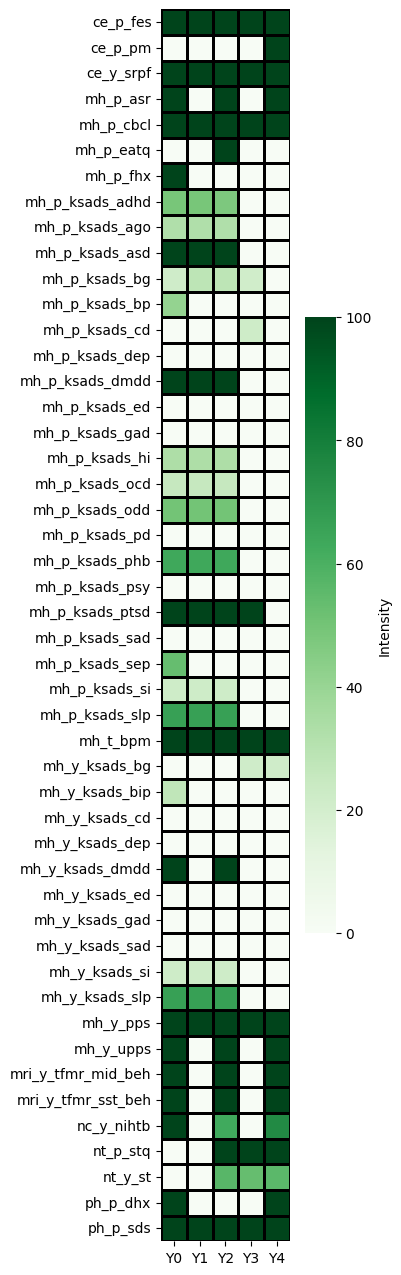

In [200]:
# Binarize the DataFrame
X_binarized = np.where(X < 20, 0, np.where(X > 80, 100, X))

# Convert back to DataFrame
df_binarized = pd.DataFrame(X_binarized, index=X.index, columns=X.columns)

plt.figure(figsize=(4,16))

# Plot with square boxes, no text, continuous 'Greens' colormap, and binarized data
sns.heatmap(df_binarized, square=True, cmap='Greens', 
            linecolor='black', linewidths=1.0, cbar_kws={'label': 'Intensity', 'shrink': 0.5})

plt.show()

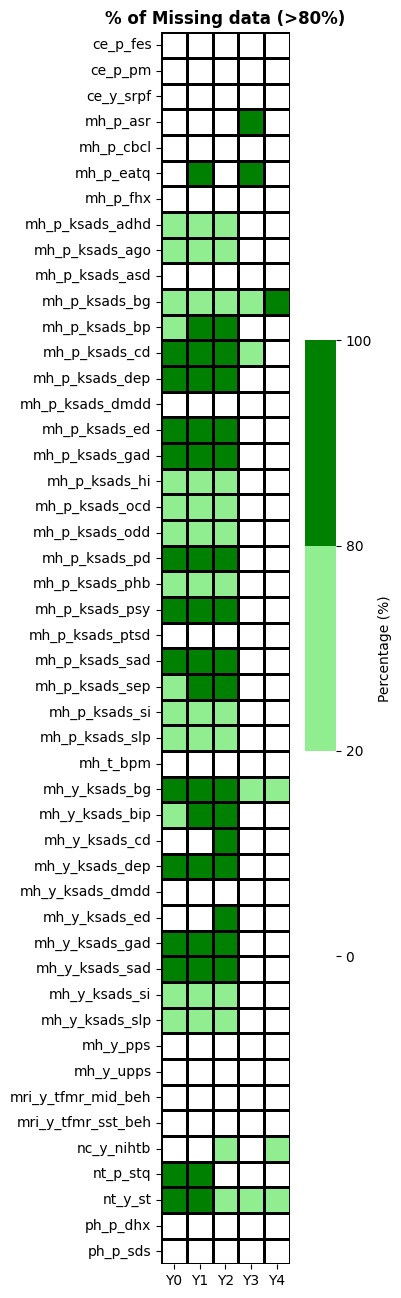

In [229]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# Binarize the DataFrame
X_binarized = np.where(X < 20, 0, np.where(X > 80, 100, X))

# Convert back to DataFrame
df_binarized = pd.DataFrame(X_binarized, index=X.index, columns=X.columns)

# Define a custom colormap: white for 0, lightgreen for values in between, and green for 1
colors = ["white", "lightgreen", "green"]
cmap = ListedColormap(colors)

# Define boundaries and norms to match binarization
bounds = [0, 20, 80, 100]
norm = BoundaryNorm(bounds, cmap.N)

# Plot the heatmap
plt.figure(figsize=(4,16))

sns.heatmap(df_binarized, square=True, cmap=cmap, norm=norm, 
                      linecolor='black', linewidths=1.0, cbar_kws={'label': 'Percentage (%)', 'shrink': 0.5})
plt.title(f"% of Missing data (>80%)", fontweight='bold')
plt.show()

# SI

In [217]:
csv_file_path = folder_path + '\\..\\SI\\' + 'refined_SI_vars.csv'

refined_SI = pd.read_csv(csv_file_path)
refined_SI

varname                                        description  \
0   ksads_23_146_p              Symptom - Wishes/Better off dead Past   
1   ksads_23_145_p           Symptom - Wishes/Better off dead Present   
2   ksads_23_810_p  Symptom - Suicidal ideation intent to act Present   
3   ksads_23_819_p     Symptom - Suicidal ideation intent to act Past   
4   ksads_23_147_p                Symptom - Suicidal Ideation Present   
..             ...                                                ...   
80  ksads_23_146_t             Symptom - Wishes/Better off dead, Past   
81  ksads_23_147_t               Symptom - Suicidal Ideation, Present   
82  ksads_23_148_t                  Symptom - Suicidal Ideation, Past   
83  ksads_23_149_t                Symptom - Suicidal Attempt, Present   
84  ksads_23_150_t                   Symptom - Suicidal Attempt, Past   

        type reporter      time  
0    passive   parent      past  
1    passive   parent   present  
2   ideation   parent  present   
3   ideation   parent      past  
4   ideation   parent  present   
..       ...      ...       ...  
80     other    youth      past  
81  ideation    youth   present  
82  ideation    youth      past  
83   attempt    youth   present  
84   attempt    youth      past  

[85 rows x 5 columns]

In [218]:
## Drop row with "other" and "nssi"
types = refined_SI["type"].unique()

strings_to_drop = ["other", "nssi"]

# Create a regular expression pattern that matches any of the strings
pattern = '|'.join(strings_to_drop)

# Drop rows where 'Column1' contains any of the specified strings
refined_SI_filtered = refined_SI[~refined_SI['type'].str.contains(pattern)]
types = refined_SI_filtered["type"].unique()
types

array(['passive', 'ideation', 'attempt'], dtype=object)

In [219]:
# Merge parent and youth csvs 
csv_file_path = folder_path + '\\' + "mh_p_ksads_ss.csv"
parent = pd.read_csv(csv_file_path)

parent = parent.replace({"baseline_year_1_arm_1": "Year_0", 
                "1_year_follow_up_y_arm_1": "Year_1",
                "2_year_follow_up_y_arm_1": "Year_2",
                "3_year_follow_up_y_arm_1": "Year_3",
                "4_year_follow_up_y_arm_1": "Year_4"
                })

parent["mergeid"] = parent["src_subject_id"] + parent["eventname"]

csv_file_path = folder_path + '\\' + "mh_y_ksads_ss.csv"
youth = pd.read_csv(csv_file_path)

youth = youth.replace({"baseline_year_1_arm_1": "Year_0", 
                "1_year_follow_up_y_arm_1": "Year_1",
                "2_year_follow_up_y_arm_1": "Year_2",
                "3_year_follow_up_y_arm_1": "Year_3",
                "4_year_follow_up_y_arm_1": "Year_4"
                })

youth["mergeid"] = youth["src_subject_id"] + youth["eventname"]

full_df = youth.merge(parent, on = "mergeid", how = "left")

print(full_df.shape) 

(48790, 3824)


In [166]:
# Drop duplicated columns 
#full_df = full_df.loc[:, ~full_df.T.duplicated()]

#print(full_df.shape)

In [215]:
vars_parent = set(refined_SI_filtered["varname"][refined_SI_filtered["reporter"] == 'parent'].values)
vars_youth = set(refined_SI_filtered["varname"][refined_SI_filtered["reporter"] == 'youth'].values)
vars = set(refined_SI_filtered["varname"].values)
print(len(vars_parent), len(vars_youth))

33 32


In [216]:
full_df = full_df[["eventname_x", "mergeid"] + list(vars)]
full_df['subject'] = full_df['mergeid'].str.split('Year', n=1).str[0]
full_df = full_df.drop(columns = ["mergeid"])
full_df

eventname_x  ksads_23_953_t  ksads_23_950_t  ksads_23_146_p  \
0          Year_0             0.0             0.0             0.0   
1          Year_0             0.0             0.0             0.0   
2          Year_0             0.0             0.0             0.0   
3          Year_0             0.0             0.0             0.0   
4          Year_0             0.0             0.0             1.0   
...           ...             ...             ...             ...   
48785      Year_4             NaN             NaN             NaN   
48786      Year_4             NaN             NaN             NaN   
48787      Year_4             NaN             NaN             NaN   
48788      Year_4             NaN             NaN             NaN   
48789      Year_4             NaN             NaN             NaN   

       ksads_23_959_t  ksads_23_960_t  ksads_23_149_t  ksads_23_954_p  \
0                 0.0             0.0             0.0             0.0   
1                 0.0             0.0             0.0             0.0   
2                 1.0             0.0             1.0             0.0   
3                 0.0             0.0             0.0             0.0   
4                 0.0             0.0             0.0             0.0   
...               ...             ...             ...             ...   
48785             NaN             NaN             NaN             NaN   
48786             NaN             NaN             NaN             NaN   
48787             NaN             NaN             NaN             NaN   
48788             NaN             NaN             NaN             NaN   
48789             NaN             NaN             NaN             NaN   

       ksads_23_813_t  ksads_23_963_t  ...  ksads_23_148_t  ksads_23_811_p  \
0               888.0             0.0  ...             0.0           888.0   
1               888.0             0.0  ...             0.0           888.0   
2                 0.0             0.0  ...             1.0             0.0   
3               888.0             0.0  ...             0.0           888.0   
4                 0.0             0.0  ...             0.0             0.0   
...               ...             ...  ...             ...             ...   
48785             NaN             NaN  ...             NaN             NaN   
48786             NaN             NaN  ...             NaN             NaN   
48787             NaN             NaN  ...             NaN             NaN   
48788             NaN             NaN  ...             NaN             NaN   
48789             NaN             NaN  ...             NaN             NaN   

       ksads_23_147_t  ksads_23_953_p  ksads_23_952_t  ksads_23_948_t  \
0                 0.0             0.0             0.0             0.0   
1                 0.0             0.0             0.0             0.0   
2                 1.0             0.0             0.0             0.0   
3                 0.0             0.0             0.0             0.0   
4                 0.0             0.0             0.0             0.0   
...               ...             ...             ...             ...   
48785             NaN             NaN             NaN             NaN   
48786             NaN             NaN             NaN             NaN   
48787             NaN             NaN             NaN             NaN   
48788             NaN             NaN             NaN             NaN   
48789             NaN             NaN             NaN             NaN   

       ksads_23_821_t  ksads_23_150_p  ksads_23_949_p           subject  
0               888.0             0.0             0.0  NDAR_INV003RTV85  
1               888.0             0.0             0.0  NDAR_INV005V6D2C  
2                 0.0             0.0             0.0  NDAR_INV007W6H7B  
3               888.0             0.0             0.0  NDAR_INV00BD7VDC  
4                 0.0             0.0             0.0  NDAR_INV00CY2MDM  
...               ...             ...     

In [169]:
#full_df['eventname_x'] = full_df['eventname_x'].apply(lambda x: '0_' + x if x.startswith('baseline') else x)
full_df.rename(columns = {"eventname_x": "eventname"}, inplace = True)
full_df

eventname  ksads_23_953_t  ksads_23_950_t  ksads_23_146_p  \
0        Year_0             0.0             0.0             0.0   
1        Year_0             0.0             0.0             0.0   
2        Year_0             0.0             0.0             0.0   
3        Year_0             0.0             0.0             0.0   
4        Year_0             0.0             0.0             1.0   
...         ...             ...             ...             ...   
48785    Year_4             NaN             NaN             NaN   
48786    Year_4             NaN             NaN             NaN   
48787    Year_4             NaN             NaN             NaN   
48788    Year_4             NaN             NaN             NaN   
48789    Year_4             NaN             NaN             NaN   

       ksads_23_959_t  ksads_23_960_t  ksads_23_149_t  ksads_23_954_p  \
0                 0.0             0.0             0.0             0.0   
1                 0.0             0.0             0.0             0.0   
2                 1.0             0.0             1.0             0.0   
3                 0.0             0.0             0.0             0.0   
4                 0.0             0.0             0.0             0.0   
...               ...             ...             ...             ...   
48785             NaN             NaN             NaN             NaN   
48786             NaN             NaN             NaN             NaN   
48787             NaN             NaN             NaN             NaN   
48788             NaN             NaN             NaN             NaN   
48789             NaN             NaN             NaN             NaN   

       ksads_23_813_t  ksads_23_963_t  ...  ksads_23_148_t  ksads_23_811_p  \
0               888.0             0.0  ...             0.0           888.0   
1               888.0             0.0  ...             0.0           888.0   
2                 0.0             0.0  ...             1.0             0.0   
3               888.0             0.0  ...             0.0           888.0   
4                 0.0             0.0  ...             0.0             0.0   
...               ...             ...  ...             ...             ...   
48785             NaN             NaN  ...             NaN             NaN   
48786             NaN             NaN  ...             NaN             NaN   
48787             NaN             NaN  ...             NaN             NaN   
48788             NaN             NaN  ...             NaN             NaN   
48789             NaN             NaN  ...             NaN             NaN   

       ksads_23_147_t  ksads_23_953_p  ksads_23_952_t  ksads_23_948_t  \
0                 0.0             0.0             0.0             0.0   
1                 0.0             0.0             0.0             0.0   
2                 1.0             0.0             0.0             0.0   
3                 0.0             0.0             0.0             0.0   
4                 0.0             0.0             0.0             0.0   
...               ...             ...             ...             ...   
48785             NaN             NaN             NaN             NaN   
48786             NaN             NaN             NaN             NaN   
48787             NaN             NaN             NaN             NaN   
48788             NaN             NaN             NaN             NaN   
48789             NaN             NaN             NaN             NaN   

       ksads_23_821_t  ksads_23_150_p  ksads_23_949_p           subject  
0               888.0             0.0             0.0  NDAR_INV003RTV85  
1               888.0             0.0             0.0  NDAR_INV005V6D2C  
2                 0.0             0.0             0.0  NDAR_INV007W6H7B  
3               888.0             0.0             0.0  NDAR_INV00BD7VDC  
4                 0.0             0.0             0.0  NDAR_INV00CY2MDM  
...               ...             ...             ...             

In [170]:
years = full_df["eventname"].unique()
years

array(['Year_0', 'Year_1', 'Year_2', 'Year_3', 'Year_4'], dtype=object)

In [171]:
full_df.replace([555,666,777,888,999], np.nan, inplace=True)
full_df


eventname  ksads_23_953_t  ksads_23_950_t  ksads_23_146_p  \
0        Year_0             0.0             0.0             0.0   
1        Year_0             0.0             0.0             0.0   
2        Year_0             0.0             0.0             0.0   
3        Year_0             0.0             0.0             0.0   
4        Year_0             0.0             0.0             1.0   
...         ...             ...             ...             ...   
48785    Year_4             NaN             NaN             NaN   
48786    Year_4             NaN             NaN             NaN   
48787    Year_4             NaN             NaN             NaN   
48788    Year_4             NaN             NaN             NaN   
48789    Year_4             NaN             NaN             NaN   

       ksads_23_959_t  ksads_23_960_t  ksads_23_149_t  ksads_23_954_p  \
0                 0.0             0.0             0.0             0.0   
1                 0.0             0.0             0.0             0.0   
2                 1.0             0.0             1.0             0.0   
3                 0.0             0.0             0.0             0.0   
4                 0.0             0.0             0.0             0.0   
...               ...             ...             ...             ...   
48785             NaN             NaN             NaN             NaN   
48786             NaN             NaN             NaN             NaN   
48787             NaN             NaN             NaN             NaN   
48788             NaN             NaN             NaN             NaN   
48789             NaN             NaN             NaN             NaN   

       ksads_23_813_t  ksads_23_963_t  ...  ksads_23_148_t  ksads_23_811_p  \
0                 NaN             0.0  ...             0.0             NaN   
1                 NaN             0.0  ...             0.0             NaN   
2                 0.0             0.0  ...             1.0             0.0   
3                 NaN             0.0  ...             0.0             NaN   
4                 0.0             0.0  ...             0.0             0.0   
...               ...             ...  ...             ...             ...   
48785             NaN             NaN  ...             NaN             NaN   
48786             NaN             NaN  ...             NaN             NaN   
48787             NaN             NaN  ...             NaN             NaN   
48788             NaN             NaN  ...             NaN             NaN   
48789             NaN             NaN  ...             NaN             NaN   

       ksads_23_147_t  ksads_23_953_p  ksads_23_952_t  ksads_23_948_t  \
0                 0.0             0.0             0.0             0.0   
1                 0.0             0.0             0.0             0.0   
2                 1.0             0.0             0.0             0.0   
3                 0.0             0.0             0.0             0.0   
4                 0.0             0.0             0.0             0.0   
...               ...             ...             ...             ...   
48785             NaN             NaN             NaN             NaN   
48786             NaN             NaN             NaN             NaN   
48787             NaN             NaN             NaN             NaN   
48788             NaN             NaN             NaN             NaN   
48789             NaN             NaN             NaN             NaN   

       ksads_23_821_t  ksads_23_150_p  ksads_23_949_p           subject  
0                 NaN             0.0             0.0  NDAR_INV003RTV85  
1                 NaN             0.0             0.0  NDAR_INV005V6D2C  
2                 0.0             0.0             0.0  NDAR_INV007W6H7B  
3                 NaN             0.0             0.0  NDAR_INV00BD7VDC  
4                 0.0             0.0             0.0  NDAR_INV00CY2MDM  
...               ...             ...             ...             

In [172]:
full_summary = pd.DataFrame()
for reporter in ["parent", "youth"]: 
    for type in types:
        var = list(set(refined_SI_filtered["varname"][(refined_SI_filtered["type"] == type) & (refined_SI_filtered["reporter"] == reporter)].values))
        if reporter == "parent":
            col = f"{type}_P"
        elif reporter == "youth":
            col = f"{type}_Y"
        full_summary[f"{col}"] = full_df[var].sum(axis=1)

# Make dataset binary 
full_summary_binary = full_summary.applymap(lambda x: 1 if x > 0 else 0)

# Create a parent AND youth columns for types 
full_summary_binary["passive_PY"]  =  full_summary_binary["passive_P"]  + full_summary_binary["passive_Y"]
full_summary_binary["ideation_PY"] =  full_summary_binary["ideation_P"] + full_summary_binary["ideation_Y"]
full_summary_binary["attempt_PY"]  =  full_summary_binary["attempt_P"]  + full_summary_binary["attempt_Y"]

# Makes the parent AND youth columns binary if both are equal to 1
full_summary_binary[["passive_PY", "ideation_PY", "attempt_PY"]] = full_summary_binary[["passive_PY", "ideation_PY", "attempt_PY"]].applymap(lambda x: 1 if x == 2 else 0)

# Add information
full_summary_binary["eventname"] = full_df["eventname"]
full_summary_binary["subject"] = full_df["subject"]
full_summary_binary

passive_P  ideation_P  attempt_P  passive_Y  ideation_Y  attempt_Y  \
0              0           0          0          0           0          0   
1              0           0          0          0           0          0   
2              0           0          0          0           1          1   
3              0           0          0          0           0          0   
4              1           0          0          0           0          0   
...          ...         ...        ...        ...         ...        ...   
48785          0           0          0          0           0          0   
48786          0           0          0          0           0          0   
48787          0           0          0          0           0          0   
48788          0           0          0          0           0          0   
48789          0           0          0          0           0          0   

       passive_PY  ideation_PY  attempt_PY eventname           subject  
0               0            0           0    Year_0  NDAR_INV003RTV85  
1               0            0           0    Year_0  NDAR_INV005V6D2C  
2               0            0           0    Year_0  NDAR_INV007W6H7B  
3               0            0           0    Year_0  NDAR_INV00BD7VDC  
4               0            0           0    Year_0  NDAR_INV00CY2MDM  
...           ...          ...         ...       ...               ...  
48785           0            0           0    Year_4  NDAR_INVZZNX6W2P  
48786           0            0           0    Year_4  NDAR_INVZZPKBDAC  
48787           0            0           0    Year_4  NDAR_INVZZZ2ALR6  
48788           0            0           0    Year_4  NDAR_INVZZZNB0XC  
48789           0            0           0    Year_4  NDAR_INVZZZP87KR  

[48790 rows x 11 columns]

In [173]:
grouped = full_summary_binary.groupby('eventname')
grouped_summary = grouped.sum()
grouped_summary

passive_P  ideation_P  attempt_P  passive_Y  ideation_Y  attempt_Y  \
eventname                                                                       
Year_0           768         454         52          0         994        156   
Year_1             0           0          0          0         888        142   
Year_2           753         625         82          0         835        167   
Year_3             0           0          0          0           0          0   
Year_4             0           0          0          0           0          0   

           passive_PY  ideation_PY  attempt_PY  
eventname                                       
Year_0              0          149          14  
Year_1              0            0           0  
Year_2              0          218          28  
Year_3              0            0           0  
Year_4              0            0           0

In [174]:
#grouped_summary = grouped_summary.set_index("eventname")
grouped_summary["passive any"] = grouped_summary[["passive_P", "passive_Y"]].sum(axis=1) 
grouped_summary["ideation any"] = grouped_summary[["ideation_P", "ideation_Y"]].sum(axis=1) 
grouped_summary["attempt any"] = grouped_summary[["attempt_P", "attempt_Y"]].sum(axis=1) 
grouped_summary

passive_P  ideation_P  attempt_P  passive_Y  ideation_Y  attempt_Y  \
eventname                                                                       
Year_0           768         454         52          0         994        156   
Year_1             0           0          0          0         888        142   
Year_2           753         625         82          0         835        167   
Year_3             0           0          0          0           0          0   
Year_4             0           0          0          0           0          0   

           passive_PY  ideation_PY  attempt_PY  passive any  ideation any  \
eventname                                                                   
Year_0              0          149          14          768          1448   
Year_1              0            0           0            0           888   
Year_2              0          218          28          753          1460   
Year_3              0            0           0            0             0   
Year_4              0            0           0            0             0   

           attempt any  
eventname               
Year_0             208  
Year_1             142  
Year_2             249  
Year_3               0  
Year_4               0

In [175]:
grouped_summary_reordered = grouped_summary[["passive_P", "passive_Y", "passive_PY", "passive any",
                                            "ideation_P", "ideation_Y", "ideation_PY","ideation any",
                                            "attempt_P", "attempt_Y", "attempt_PY", "attempt any"]]
grouped_summary_reordered

passive_P  passive_Y  passive_PY  passive any  ideation_P  \
eventname                                                              
Year_0           768          0           0          768         454   
Year_1             0          0           0            0           0   
Year_2           753          0           0          753         625   
Year_3             0          0           0            0           0   
Year_4             0          0           0            0           0   

           ideation_Y  ideation_PY  ideation any  attempt_P  attempt_Y  \
eventname                                                                
Year_0            994          149          1448         52        156   
Year_1            888            0           888          0        142   
Year_2            835          218          1460         82        167   
Year_3              0            0             0          0          0   
Year_4              0            0             0          0          0   

           attempt_PY  attempt any  
eventname                           
Year_0             14          208  
Year_1              0          142  
Year_2             28          249  
Year_3              0            0  
Year_4              0            0

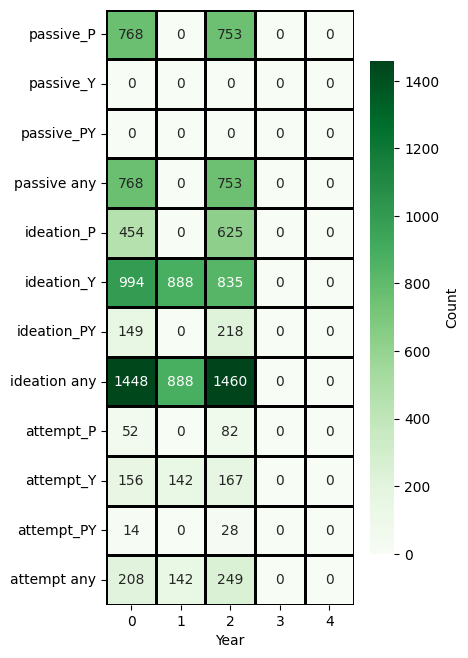

In [176]:
plt.figure(figsize=(4,16))

# Plot with square boxes, no text, continuous 'Greens' colormap, and binarized data
sns.heatmap(grouped_summary_reordered.T, annot=True, square=True, cmap='Greens', fmt=".0f", 
            linecolor='black', linewidths=1.0, cbar_kws={'label': 'Count', 'shrink': 0.4}, 
            xticklabels=["0", "1", "2", "3", "4"])
plt.xlabel("Year")
plt.show()

## Creating a wide dataframe for all subjects

In [177]:
full_summary_binary_wide = full_summary_binary[['passive_P', 'ideation_P', 'attempt_P', 
                                               'passive_Y', 'ideation_Y', 'attempt_Y', 
                                               'eventname', 'subject']]
full_summary_binary_wide

passive_P  ideation_P  attempt_P  passive_Y  ideation_Y  attempt_Y  \
0              0           0          0          0           0          0   
1              0           0          0          0           0          0   
2              0           0          0          0           1          1   
3              0           0          0          0           0          0   
4              1           0          0          0           0          0   
...          ...         ...        ...        ...         ...        ...   
48785          0           0          0          0           0          0   
48786          0           0          0          0           0          0   
48787          0           0          0          0           0          0   
48788          0           0          0          0           0          0   
48789          0           0          0          0           0          0   

      eventname           subject  
0        Year_0  NDAR_INV003RTV85  
1        Year_0  NDAR_INV005V6D2C  
2        Year_0  NDAR_INV007W6H7B  
3        Year_0  NDAR_INV00BD7VDC  
4        Year_0  NDAR_INV00CY2MDM  
...         ...               ...  
48785    Year_4  NDAR_INVZZNX6W2P  
48786    Year_4  NDAR_INVZZPKBDAC  
48787    Year_4  NDAR_INVZZZ2ALR6  
48788    Year_4  NDAR_INVZZZNB0XC  
48789    Year_4  NDAR_INVZZZP87KR  

[48790 rows x 8 columns]

In [178]:
full_summary_binary_wide[['passive_P', 'ideation_P', 'attempt_P']] = full_summary_binary_wide[['passive_P', 'ideation_P', 'attempt_P']].applymap(lambda x: "P" if x == 1 else x)
full_summary_binary_wide[['passive_Y', 'ideation_Y', 'attempt_Y']] = full_summary_binary_wide[['passive_Y', 'ideation_Y', 'attempt_Y']].applymap(lambda x: "Y" if x == 1 else x)

full_summary_binary_wide["passive"] = full_summary_binary_wide["passive_P"].astype(str) + full_summary_binary_wide["passive_Y"].astype(str)
full_summary_binary_wide["ideation"] = full_summary_binary_wide["ideation_P"].astype(str) + full_summary_binary_wide["ideation_Y"].astype(str)
full_summary_binary_wide["attempt"] = full_summary_binary_wide["attempt_P"].astype(str) + full_summary_binary_wide["attempt_Y"].astype(str)

full_summary_binary_wide = full_summary_binary_wide.drop(columns = ['passive_P', 'ideation_P', 'attempt_P', 'passive_Y', 'ideation_Y', 'attempt_Y'])
full_summary_binary_wide


eventname           subject passive ideation attempt
0        Year_0  NDAR_INV003RTV85      00       00      00
1        Year_0  NDAR_INV005V6D2C      00       00      00
2        Year_0  NDAR_INV007W6H7B      00       0Y      0Y
3        Year_0  NDAR_INV00BD7VDC      00       00      00
4        Year_0  NDAR_INV00CY2MDM      P0       00      00
...         ...               ...     ...      ...     ...
48785    Year_4  NDAR_INVZZNX6W2P      00       00      00
48786    Year_4  NDAR_INVZZPKBDAC      00       00      00
48787    Year_4  NDAR_INVZZZ2ALR6      00       00      00
48788    Year_4  NDAR_INVZZZNB0XC      00       00      00
48789    Year_4  NDAR_INVZZZP87KR      00       00      00

[48790 rows x 5 columns]

In [179]:
x = full_summary_binary_wide.copy()
x[["passive"]] = x[["passive"]].applymap(lambda x: 1 if x != "00" else 0)
x[["ideation"]] = x[["ideation"]].applymap(lambda x: 2 if x != "00" else 0)
x[["attempt"]] = x[["attempt"]].applymap(lambda x: 3 if x != "00" else 0)
x["Severity"] = x[["passive", "ideation", "attempt"]].max(axis = 1)

x[["Severity"]] = x[["Severity"]].applymap(
    lambda x: "passive" if x == 1 else ("ideation" if x == 2 else ("attempt" if x == 3 else 0)))

full_summary_binary_wide["Severity"] = x["Severity"]
full_summary_binary_wide = full_summary_binary_wide.replace({"00": 0, 
                               "0Y": "Y", 
                               "P0": "P", 
                               })
full_summary_binary_wide

eventname           subject passive ideation attempt Severity
0        Year_0  NDAR_INV003RTV85       0        0       0        0
1        Year_0  NDAR_INV005V6D2C       0        0       0        0
2        Year_0  NDAR_INV007W6H7B       0        Y       Y  attempt
3        Year_0  NDAR_INV00BD7VDC       0        0       0        0
4        Year_0  NDAR_INV00CY2MDM       P        0       0  passive
...         ...               ...     ...      ...     ...      ...
48785    Year_4  NDAR_INVZZNX6W2P       0        0       0        0
48786    Year_4  NDAR_INVZZPKBDAC       0        0       0        0
48787    Year_4  NDAR_INVZZZ2ALR6       0        0       0        0
48788    Year_4  NDAR_INVZZZNB0XC       0        0       0        0
48789    Year_4  NDAR_INVZZZP87KR       0        0       0        0

[48790 rows x 6 columns]

In [180]:
axis=1# Reshape the DataFrame
reshaped_full_df = full_summary_binary_wide.pivot_table(
    index='subject',            # Rows become subjects
    columns='eventname',        # Columns become different years
    values=['passive', 'ideation', 'attempt', "Severity"],  # Values to keep
    aggfunc='first'             # Aggregation function (if needed, e.g., 'first')
).reset_index()

# Flatten the multi-index columns resulting from pivot_table
reshaped_full_df.columns = [f'{j}_{i}' if j else f'{i}' for i, j in reshaped_full_df.columns]

reshaped_full_df

subject Year_0_Severity Year_1_Severity Year_2_Severity  \
0      NDAR_INV003RTV85               0               0               0   
1      NDAR_INV005V6D2C               0               0               0   
2      NDAR_INV007W6H7B         attempt             NaN             NaN   
3      NDAR_INV00BD7VDC               0               0               0   
4      NDAR_INV00CY2MDM         passive               0               0   
...                 ...             ...             ...             ...   
11859  NDAR_INVZZNX6W2P               0               0               0   
11860  NDAR_INVZZPKBDAC               0               0               0   
11861  NDAR_INVZZZ2ALR6               0               0        ideation   
11862  NDAR_INVZZZNB0XC               0             NaN             NaN   
11863  NDAR_INVZZZP87KR               0               0               0   

      Year_3_Severity Year_4_Severity Year_0_attempt Year_1_attempt  \
0                   0             NaN              0              0   
1                   0             NaN              0              0   
2                   0               0              Y            NaN   
3                 NaN             NaN              0              0   
4                   0               0              0              0   
...               ...             ...            ...            ...   
11859               0               0              0              0   
11860               0               0              0              0   
11861               0               0              0              0   
11862               0               0              0            NaN   
11863               0               0              0              0   

      Year_2_attempt Year_3_attempt  ... Year_0_ideation Year_1_ideation  \
0                  0              0  ...               0               0   
1                  0              0  ...               0               0   
2                NaN              0  ...               Y             NaN   
3                  0            NaN  ...               0               0   
4                  0              0  ...               0               0   
...              ...            ...  ...             ...             ...   
11859              0              0  ...               0               0   
11860              0              0  ...               0               0   
11861              0              0  ...               0               0   
11862            NaN              0  ...               0             NaN   
11863              0              0  ...               0               0   

      Year_2_ideation Year_3_ideation Year_4_ideation Year_0_passive  \
0                   0               0             NaN              0   
1                   0               0             NaN              0   
2                 NaN               0               0              0   
3                   0             NaN             NaN              0   
4                   0               0               0              P   
...               ...             ...             ...            ...   
11859               0               0               0              0   
11860               0               0               0              0   
11861               Y               0               0              0   
11862             NaN               0               0              0   
11863               0               0               0              0   

      Year_1_passive Year_2_passive Year_3_passive Year_4_passive  
0                  0              0              0            NaN  
1                  0              0              0            NaN  
2                NaN            NaN              0              0  
3                  0              0            NaN            NaN  
4                  0              0              0              0  
...              ...            ...            ...            ...  
11859   

In [181]:
for col in reshaped_full_df.columns:
    print(reshaped_full_df[col].unique(), "\n")

['NDAR_INV003RTV85' 'NDAR_INV005V6D2C' 'NDAR_INV007W6H7B' ...
 'NDAR_INVZZZ2ALR6' 'NDAR_INVZZZNB0XC' 'NDAR_INVZZZP87KR'] 

[0 'attempt' 'passive' 'ideation' nan] 

[0 nan 'ideation' 'attempt'] 

[0 nan 'ideation' 'attempt' 'passive'] 

[0 nan] 

[nan 0] 

[0 'Y' nan 'P' 'PY'] 

[0 nan 'Y'] 

[0 nan 'P' 'Y' 'PY'] 

[0 nan] 

[nan 0] 

[0 'Y' 'PY' 'P' nan] 

[0 nan 'Y'] 

[0 nan 'Y' 'PY' 'P'] 

[0 nan] 

[nan 0] 

[0 'P' nan] 

[0 nan] 

[0 nan 'P'] 

[0 nan] 

[nan 0] 



In [182]:
#reshaped_full_df.to_csv("ABCD_Endorsed.csv", index = False)

In [183]:
# To show that parent is missing info at year 1
#vars_parent.add("eventname")
#x = parent[vars_parent]
#for col in x.columns: 
#   print(col, ":", x[x["eventname"] == '1_year_follow_up_y_arm_1'][col].unique())

## Year Changes

In [184]:
years = full_summary_binary_wide["eventname"].unique()
years

array(['Year_0', 'Year_1', 'Year_2', 'Year_3', 'Year_4'], dtype=object)

In [185]:
full_summary_binary_wide

eventname           subject passive ideation attempt Severity
0        Year_0  NDAR_INV003RTV85       0        0       0        0
1        Year_0  NDAR_INV005V6D2C       0        0       0        0
2        Year_0  NDAR_INV007W6H7B       0        Y       Y  attempt
3        Year_0  NDAR_INV00BD7VDC       0        0       0        0
4        Year_0  NDAR_INV00CY2MDM       P        0       0  passive
...         ...               ...     ...      ...     ...      ...
48785    Year_4  NDAR_INVZZNX6W2P       0        0       0        0
48786    Year_4  NDAR_INVZZPKBDAC       0        0       0        0
48787    Year_4  NDAR_INVZZZ2ALR6       0        0       0        0
48788    Year_4  NDAR_INVZZZNB0XC       0        0       0        0
48789    Year_4  NDAR_INVZZZP87KR       0        0       0        0

[48790 rows x 6 columns]

In [186]:
full_summary_binary_wide[full_summary_binary_wide["subject"] == "NDAR_INV00CY2MDM"]

eventname           subject passive ideation attempt Severity
4        Year_0  NDAR_INV00CY2MDM       P        0       0  passive
11815    Year_1  NDAR_INV00CY2MDM       0        0       0        0
22910    Year_2  NDAR_INV00CY2MDM       0        0       0        0
33793    Year_3  NDAR_INV00CY2MDM       0        0       0        0
44117    Year_4  NDAR_INV00CY2MDM       0        0       0        0

In [187]:
full_summary_binary_wide_l = full_summary_binary_wide[["subject", "eventname", "passive", "ideation", "attempt"]]
full_summary_binary_wide_l[["passive"]] = full_summary_binary_wide_l[["passive"]].applymap(lambda x: "p" if x != 0 else 0)
full_summary_binary_wide_l[["ideation"]] = full_summary_binary_wide_l[["ideation"]].applymap(lambda x: "i" if x != 0 else 0)
full_summary_binary_wide_l[["attempt"]] = full_summary_binary_wide_l[["attempt"]].applymap(lambda x: "a" if x != 0 else 0)
full_summary_binary_wide_l

subject eventname passive ideation attempt
0      NDAR_INV003RTV85    Year_0       0        0       0
1      NDAR_INV005V6D2C    Year_0       0        0       0
2      NDAR_INV007W6H7B    Year_0       0        i       a
3      NDAR_INV00BD7VDC    Year_0       0        0       0
4      NDAR_INV00CY2MDM    Year_0       p        0       0
...                 ...       ...     ...      ...     ...
48785  NDAR_INVZZNX6W2P    Year_4       0        0       0
48786  NDAR_INVZZPKBDAC    Year_4       0        0       0
48787  NDAR_INVZZZ2ALR6    Year_4       0        0       0
48788  NDAR_INVZZZNB0XC    Year_4       0        0       0
48789  NDAR_INVZZZP87KR    Year_4       0        0       0

[48790 rows x 5 columns]

In [188]:
full_summary_binary_wide_l["unique_groups"] = full_summary_binary_wide_l["passive"].astype(str) + full_summary_binary_wide_l["ideation"].astype(str) + full_summary_binary_wide_l["attempt"].astype(str)
print(full_summary_binary_wide_l["unique_groups"].value_counts())


000    44757
0i0     2155
pi0      757
p00      564
0ia      326
pia      191
00a       31
p0a        9
Name: unique_groups, dtype: int64


In [189]:
for year in years: 
    print(year)
    print(full_summary_binary_wide_l["unique_groups"][full_summary_binary_wide_l["eventname"] == year].value_counts())
    print("\n")

Year_0
000    10171
0i0      760
pi0      365
p00      322
0ia       99
pia       75
00a       14
p0a        6
Name: unique_groups, dtype: int64


Year_1
000    10199
0i0      754
0ia      134
00a        8
Name: unique_groups, dtype: int64


Year_2
000    9387
0i0     641
pi0     392
p00     242
pia     116
0ia      93
00a       9
p0a       3
Name: unique_groups, dtype: int64


Year_3
000    10326
Name: unique_groups, dtype: int64


Year_4
000    4674
Name: unique_groups, dtype: int64




In [190]:
df = pd.DataFrame(full_summary_binary_wide_l["unique_groups"][full_summary_binary_wide_l["eventname"] == "Year_0"].value_counts())
df.loc["0"] = len(full_summary_binary_wide_l["subject"].unique()) - df["unique_groups"].sum()
df

unique_groups
000          10171
0i0            760
pi0            365
p00            322
0ia             99
pia             75
00a             14
p0a              6
0               52

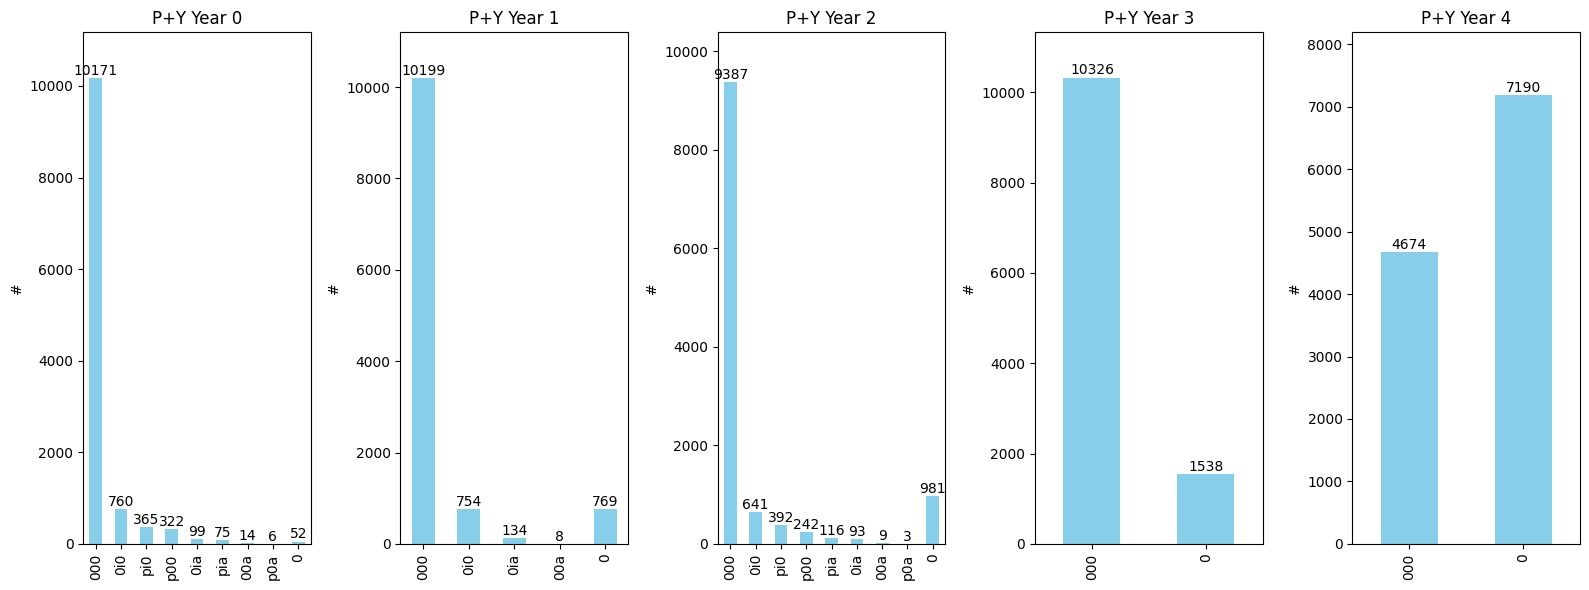

In [191]:
# Create the subplots
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

for i, year in enumerate(years): 
    # Filter the DataFrame and calculate the value counts
    df = pd.DataFrame(full_summary_binary_wide_l["unique_groups"][full_summary_binary_wide_l["eventname"] == year].value_counts())
    df.loc["0"] = len(full_summary_binary_wide_l["subject"].unique()) - df["unique_groups"].sum()
    
    # Plot the bar chart
    bars = df['unique_groups'].plot(kind='bar', ax=axes[i], color='skyblue')

    # Adding the value labels on top of each bar
    for bar in axes[i].patches:
        yval = bar.get_height()
        xval = bar.get_x() + bar.get_width() / 2
        axes[i].text(xval, yval + 0.5, f'{int(yval)}', ha='center', va='bottom')

    # Customize the subplot
    axes[i].set_title(f'P+Y Year {i}')
    axes[i].set_ylabel('#')
    axes[i].set_ylim(0, max(df['unique_groups']) + 1000)  # Adjusted ylim to fit all labels

# Show the plot
plt.tight_layout()
plt.show()

In [192]:
full_summary_binary_wide_l[["eventname", "unique_groups"]][full_summary_binary_wide_l["subject"] == "NDAR_INV00CY2MDM"]

eventname unique_groups
4        Year_0           p00
11815    Year_1           000
22910    Year_2           000
33793    Year_3           000
44117    Year_4           000

In [193]:
full_summary_binary_wide_l["unique_groups"][full_summary_binary_wide_l["eventname"] == "Year_0"].value_counts()

000    10171
0i0      760
pi0      365
p00      322
0ia       99
pia       75
00a       14
p0a        6
Name: unique_groups, dtype: int64

In [194]:
subjects = full_summary_binary_wide_l["subject"].values
subjects

array(['NDAR_INV003RTV85', 'NDAR_INV005V6D2C', 'NDAR_INV007W6H7B', ...,
       'NDAR_INVZZZ2ALR6', 'NDAR_INVZZZNB0XC', 'NDAR_INVZZZP87KR'],
      dtype=object)

In [195]:
# Both Parent and Youth 
full_summary_yty = pd.DataFrame()
for subject in set(subjects): # For all subjects 
    #x = youth_summary_binary_l[["eventname", "unique_groups"]][youth_summary_binary_l["subject"] == subject]
    x = full_summary_binary_wide_l[["eventname", "unique_groups"]][full_summary_binary_wide_l["subject"] == subject] # Pull out info for subject
    int_list = [int(item[-1]) for item in x["eventname"]] # Find which years the subject has data
    w0 = np.where(np.array(int_list) == 0)[0] # Check if year exists
    w1 = np.where(np.array(int_list) == 1)[0] # Check if year exists
    w2 = np.where(np.array(int_list) == 2)[0] # Check if year exists
    w3 = np.where(np.array(int_list) == 3)[0] # Check if year exists
    w4 = np.where(np.array(int_list) == 4)[0] # Check if year exists

    # if a value at both year 0 and year 1
    if {0,1}.issubset(int_list): 
        y = f"{x["unique_groups"].iloc[w0].values[0]}+{x["unique_groups"].iloc[w1].values[0]}"
        full_summary_yty.at[subject,"Year1"] = y
    else:
        if np.size(w0) == 0 and np.size(w1) != 0: 
            y = f"{0}+{x["unique_groups"].iloc[w1].values[0]}"
        elif np.size(w1) == 0 and np.size(w0) != 0: 
            y = f"{x["unique_groups"].iloc[w0].values[0]}+{0}"
        elif np.size(w0) == 0 and np.size(w1) == 0: 
            y = f"{0}+{0}"
        full_summary_yty.at[subject,"Year1"] = y

    # if a value at both year 1 and year 2
    if {1,2}.issubset(int_list): 
        y = f"{x["unique_groups"].iloc[w1].values[0]}+{x["unique_groups"].iloc[w2].values[0]}"
        full_summary_yty.at[subject,"Year2"] = y
    else:
        if np.size(w1) == 0 and np.size(w2) != 0: 
            y = f"{0}+{x["unique_groups"].iloc[w2].values[0]}"
        elif np.size(w2) == 0 and np.size(w1) != 0: 
            y = f"{x["unique_groups"].iloc[w1].values[0]}+{0}"
        elif np.size(w1) == 0 and np.size(w2) == 0: 
            y = f"{0}+{0}"
        full_summary_yty.at[subject,"Year2"] = y

    # if a value at both year 2 and year 3
    if {2,3}.issubset(int_list): 
        y = f"{x["unique_groups"].iloc[w2].values[0]}+{x["unique_groups"].iloc[w3].values[0]}"
        full_summary_yty.at[subject,"Year3"] = y
    else:
        if np.size(w2) == 0 and np.size(w3) != 0: 
            y = f"{0}+{x["unique_groups"].iloc[w3].values[0]}"
        elif np.size(w3) == 0 and np.size(w2) != 0: 
            y = f"{x["unique_groups"].iloc[w2].values[0]}+{0}"
        elif np.size(w2) == 0 and np.size(w3) == 0: 
            y = f"{0}+{0}"
        full_summary_yty.at[subject,"Year3"] = y

    # if a value at both year 3 and year 4
    if {3,4}.issubset(int_list): 
        y = f"{x["unique_groups"].iloc[w3].values[0]}+{x["unique_groups"].iloc[w4].values[0]}"
        full_summary_yty.at[subject,"Year4"] = y
    else:
        if np.size(w3) == 0 and np.size(w4) != 0: 
            y = f"{0}+{x["unique_groups"].iloc[w4].values[0]}"
        elif np.size(w4) == 0 and np.size(w3) != 0: 
            y = f"{x["unique_groups"].iloc[w3].values[0]}+{0}"
        elif np.size(w3) == 0 and np.size(w4) == 0: 
            y = f"{0}+{0}"
        full_summary_yty.at[subject,"Year4"] = y

    ## if a value at both year 0 and year 2
    #if {0,2}.issubset(int_list): 
    #    y = f"{x["unique_groups"].iloc[w0].values[0]}+{x["unique_groups"].iloc[w2].values[0]}"
    #    full_summary_yty.at[subject,"Year02"] = y
    #else:
    #    if np.size(w0) == 0 and np.size(w2) != 0: 
    #        y = f"{0}+{x["unique_groups"].iloc[w2].values[0]}"
    #    elif np.size(w2) == 0 and np.size(w0) != 0: 
    #        y = f"{x["unique_groups"].iloc[w0].values[0]}+{0}"
    #    elif np.size(w0) == 0 and np.size(w2) == 0: 
    #        y = f"{0}+{0}"
    #    full_summary_yty.at[subject,"Year02"] = y
    
    
full_summary_yty

Year1    Year2    Year3    Year4
NDAR_INVF0KJB1P2  000+000  000+0i0  0i0+000    000+0
NDAR_INV2KA8EUUR  000+000  000+000  000+000  000+000
NDAR_INVT4WTLFZ6  000+000  000+000  000+000    000+0
NDAR_INVHPHV6ZU8  000+000  000+000    000+0      0+0
NDAR_INVVLDYPNLT  000+000  000+000  000+000  000+000
...                   ...      ...      ...      ...
NDAR_INV3HFPA2R0  000+000  000+000  000+000    000+0
NDAR_INVCWC14R4P  p00+0i0  0i0+pi0  pi0+000  000+000
NDAR_INVE843DPZL  000+000  000+000  000+000    000+0
NDAR_INVGW88GH5L  000+000  000+000  000+000    000+0
NDAR_INVUDBJ9V2N  000+0i0  0i0+p00  p00+000  000+000

[11864 rows x 4 columns]

In [80]:
"""
Youth_yty = pd.DataFrame()
for subject in set(subjects):
    x = youth_summary_binary_l[["eventname", "unique_groups"]][youth_summary_binary_l["subject"] == subject]
    int_list = [int(item[-1]) for item in x["eventname"]]
    w0 = np.where(np.array(int_list) == 0)[0]
    w1 = np.where(np.array(int_list) == 1)[0]
    w2 = np.where(np.array(int_list) == 2)[0]
    w3 = np.where(np.array(int_list) == 3)[0]
    w4 = np.where(np.array(int_list) == 4)[0]

    if {0,1}.issubset(int_list): 
        y = f"{x["unique_groups"].iloc[w0].values[0]}+{x["unique_groups"].iloc[w1].values[0]}"
        Youth_yty.at[subject,"Year1"] = y
    else:
        if np.size(w0) == 0 and np.size(w1) != 0: 
            y = f"{0}+{x["unique_groups"].iloc[w1].values[0]}"
        elif np.size(w1) == 0 and np.size(w0) != 0: 
            y = f"{x["unique_groups"].iloc[w0].values[0]}+{0}"
        elif np.size(w0) == 0 and np.size(w1) == 0: 
            y = f"{0}+{0}"
        Youth_yty.at[subject,"Year1"] = y

    if {1,2}.issubset(int_list): 
        y = f"{x["unique_groups"].iloc[w1].values[0]}+{x["unique_groups"].iloc[w2].values[0]}"
        Youth_yty.at[subject,"Year2"] = y
    else:
        if np.size(w1) == 0 and np.size(w2) != 0: 
            y = f"{0}+{x["unique_groups"].iloc[w2].values[0]}"
        elif np.size(w2) == 0 and np.size(w1) != 0: 
            y = f"{x["unique_groups"].iloc[w1].values[0]}+{0}"
        elif np.size(w1) == 0 and np.size(w2) == 0: 
            y = f"{0}+{0}"
        Youth_yty.at[subject,"Year2"] = y

    if {2,3}.issubset(int_list): 
        y = f"{x["unique_groups"].iloc[w2].values[0]}+{x["unique_groups"].iloc[w3].values[0]}"
        Youth_yty.at[subject,"Year3"] = y
    else:
        if np.size(w2) == 0 and np.size(w3) != 0: 
            y = f"{0}+{x["unique_groups"].iloc[w3].values[0]}"
        elif np.size(w3) == 0 and np.size(w2) != 0: 
            y = f"{x["unique_groups"].iloc[w2].values[0]}+{0}"
        elif np.size(w2) == 0 and np.size(w3) == 0: 
            y = f"{0}+{0}"
        Youth_yty.at[subject,"Year3"] = y

    if {3,4}.issubset(int_list): 
        y = f"{x["unique_groups"].iloc[w3].values[0]}+{x["unique_groups"].iloc[w4].values[0]}"
        Youth_yty.at[subject,"Year4"] = y
    else:
        if np.size(w3) == 0 and np.size(w4) != 0: 
            y = f"{0}+{x["unique_groups"].iloc[w4].values[0]}"
        elif np.size(w4) == 0 and np.size(w3) != 0: 
            y = f"{x["unique_groups"].iloc[w3].values[0]}+{0}"
        elif np.size(w3) == 0 and np.size(w4) == 0: 
            y = f"{0}+{0}"
        Youth_yty.at[subject,"Year4"] = y
    
Youth_yty
"""

'\nYouth_yty = pd.DataFrame()\nfor subject in set(subjects):\n    x = youth_summary_binary_l[["eventname", "unique_groups"]][youth_summary_binary_l["subject"] == subject]\n    int_list = [int(item[-1]) for item in x["eventname"]]\n    w0 = np.where(np.array(int_list) == 0)[0]\n    w1 = np.where(np.array(int_list) == 1)[0]\n    w2 = np.where(np.array(int_list) == 2)[0]\n    w3 = np.where(np.array(int_list) == 3)[0]\n    w4 = np.where(np.array(int_list) == 4)[0]\n\n    if {0,1}.issubset(int_list): \n        y = f"{x["unique_groups"].iloc[w0].values[0]}+{x["unique_groups"].iloc[w1].values[0]}"\n        Youth_yty.at[subject,"Year1"] = y\n    else:\n        if np.size(w0) == 0 and np.size(w1) != 0: \n            y = f"{0}+{x["unique_groups"].iloc[w1].values[0]}"\n        elif np.size(w1) == 0 and np.size(w0) != 0: \n            y = f"{x["unique_groups"].iloc[w0].values[0]}+{0}"\n        elif np.size(w0) == 0 and np.size(w1) == 0: \n            y = f"{0}+{0}"\n        Youth_yty.at[subject,"Y

In [196]:
full_summary_yty["Year2"].value_counts()

000+000    8682
000+0       507
000+0i0     449
0+0         413
0i0+000     390
0+000       288
000+pi0     265
000+p00     192
0i0+0i0     142
0i0+pi0     101
000+0ia      50
000+pia      46
0i0+0        46
0ia+pia      39
0i0+p00      38
0+0i0        32
0ia+000      26
0i0+pia      22
0ia+0ia      18
0ia+0i0      16
0ia+pi0      15
0ia+0        14
0i0+0ia      14
0+pi0        10
0+pia         9
0+0ia         8
0+p00         8
000+00a       5
0ia+p00       4
000+p0a       3
00a+0ia       3
00a+0i0       2
0ia+00a       2
00a+0         1
0+00a         1
00a+pi0       1
00a+000       1
0i0+00a       1
Name: Year2, dtype: int64

In [197]:
df1 = pd.DataFrame(full_summary_yty["Year1"].value_counts())
df1 = df1.reset_index()

df2 = pd.DataFrame(full_summary_yty["Year2"].value_counts())
df2 = df2.reset_index()

df3 = pd.DataFrame(full_summary_yty["Year3"].value_counts())
df3 = df3.reset_index()

df4 = pd.DataFrame(full_summary_yty["Year4"].value_counts())
df4 = df4.reset_index()
df1

index  Year1
0   000+000   9040
1     000+0    654
2   0i0+000    536
3   000+0i0    426
4   p00+000    252
5   pi0+000    237
6   0i0+0i0    153
7   pi0+0i0     88
8   0ia+000     52
9   000+0ia     46
10    0i0+0     46
11  p00+0i0     44
12    0+000     39
13  pia+000     29
14  pia+0ia     27
15  0i0+0ia     25
16    pi0+0     25
17  0ia+0i0     21
18    p00+0     20
19  pi0+0ia     14
20  pia+0i0     14
21  0ia+0ia     13
22    0ia+0     12
23  00a+000     10
24      0+0      6
25    0+0i0      6
26  p00+0ia      5
27    pia+0      5
28  000+00a      5
29  p0a+000      4
30  00a+0ia      2
31  00a+0i0      1
32    00a+0      1
33  p0a+0ia      1
34    0+0ia      1
35  0ia+00a      1
36  pi0+00a      1
37  p00+00a      1
38  p0a+0i0      1

In [198]:
df = df1.merge(df2, on = "index", how = "left").merge(df3, on = "index", how = "left").merge(df4, on = "index", how = "left")
df

index  Year1   Year2   Year3   Year4
0   000+000   9040  8682.0  8710.0  4610.0
1     000+0    654   507.0   677.0  5716.0
2   0i0+000    536   390.0   583.0     NaN
3   000+0i0    426   449.0     NaN     NaN
4   p00+000    252     NaN   221.0     NaN
5   pi0+000    237     NaN   360.0     NaN
6   0i0+0i0    153   142.0     NaN     NaN
7   pi0+0i0     88     NaN     NaN     NaN
8   0ia+000     52    26.0    75.0     NaN
9   000+0ia     46    50.0     NaN     NaN
10    0i0+0     46    46.0    58.0     NaN
11  p00+0i0     44     NaN     NaN     NaN
12    0+000     39   288.0   265.0    64.0
13  pia+000     29     NaN   102.0     NaN
14  pia+0ia     27     NaN     NaN     NaN
15  0i0+0ia     25    14.0     NaN     NaN
16    pi0+0     25     NaN    32.0     NaN
17  0ia+0i0     21    16.0     NaN     NaN
18    p00+0     20     NaN    21.0     NaN
19  pi0+0ia     14     NaN     NaN     NaN
20  pia+0i0     14     NaN     NaN     NaN
21  0ia+0ia     13    18.0     NaN     NaN
22    0ia+0     12    14.0    18.0     NaN
23  00a+000     10     1.0     7.0     NaN
24      0+0      6   413.0   716.0  1474.0
25    0+0i0      6    32.0     NaN     NaN
26  p00+0ia      5     NaN     NaN     NaN
27    pia+0      5     NaN    14.0     NaN
28  000+00a      5     5.0     NaN     NaN
29  p0a+000      4     NaN     3.0     NaN
30  00a+0ia      2     3.0     NaN     NaN
31  00a+0i0      1     2.0     NaN     NaN
32    00a+0      1     1.0     2.0     NaN
33  p0a+0ia      1     NaN     NaN     NaN
34    0+0ia      1     8.0     NaN     NaN
35  0ia+00a      1     2.0     NaN     NaN
36  pi0+00a      1     NaN     NaN     NaN
37  p00+00a      1     NaN     NaN     NaN
38  p0a+0i0      1     NaN     NaN     NaN

In [199]:
import plotly.graph_objects as go

# Split the source and target nodes
df[['source', 'target']] = df['index'].str.split('+', expand=True)

# Function to create connections between years with source from previous year and target to current year
def create_connections(df, from_year, to_year):
    return pd.DataFrame({
        'source': df['source'] + f'_{from_year}',
        'target': df['target'] + f'_{to_year}',
        'value': df[to_year]
    })

# Create connections from Year0 -> Year1, Year1 -> Year2, Year2 -> Year3, and Year3 -> Year4
connections = pd.concat([
    create_connections(df, 'Year0', 'Year1'),
    create_connections(df, 'Year1', 'Year2'),
    create_connections(df, 'Year2', 'Year3'),
    create_connections(df, 'Year3', 'Year4')
])

# Replace NaN values with 0
#connections.fillna(0, inplace=True)

# Create a list of all unique nodes
nodes = list(pd.unique(connections[['source', 'target']].values.ravel('K')))

# Create a mapping from node label to index
node_map = {node: i for i, node in enumerate(nodes)}

# Ensure nodes are in the correct order
year_order = ['Year0', 'Year1', 'Year2', 'Year3', 'Year4']
node_order = []
for year in year_order:
    node_order.extend([node for node in nodes if f'_{year}' in node])

# Create a mapping from node label to index based on ordered nodes
node_map = {node: i for i, node in enumerate(node_order)}

# Create the source and target arrays using the node_map
connections['source_id'] = connections['source'].map(node_map)
connections['target_id'] = connections['target'].map(node_map)

# Extract source, target, and count arrays
source = connections['source_id'].tolist()
target = connections['target_id'].tolist()
count = connections['value'].tolist()

# Create the Sankey plot
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_order,
        # Set the x position for each node based on its year
        x=[0.1 if 'Year0' in node else (0.3 if 'Year1' in node else (1.5 if 'Year2' in node else (0.7 if 'Year3' in node else 0.9))) for node in node_order]
    ),
    link=dict(
        source=source,  # Indices correspond to labels in `nodes`
        target=target,
        value=count
    )
))

fig.update_layout(
    title_text="Sankey Diagram Connecting Year0 to Year4",
    font_size=10
)

fig.show()

In [200]:
full_summary_binary_wide

eventname           subject passive ideation attempt Severity
0        Year_0  NDAR_INV003RTV85       0        0       0        0
1        Year_0  NDAR_INV005V6D2C       0        0       0        0
2        Year_0  NDAR_INV007W6H7B       0        Y       Y  attempt
3        Year_0  NDAR_INV00BD7VDC       0        0       0        0
4        Year_0  NDAR_INV00CY2MDM       P        0       0  passive
...         ...               ...     ...      ...     ...      ...
48785    Year_4  NDAR_INVZZNX6W2P       0        0       0        0
48786    Year_4  NDAR_INVZZPKBDAC       0        0       0        0
48787    Year_4  NDAR_INVZZZ2ALR6       0        0       0        0
48788    Year_4  NDAR_INVZZZNB0XC       0        0       0        0
48789    Year_4  NDAR_INVZZZP87KR       0        0       0        0

[48790 rows x 6 columns]

In [201]:
# Merge year changes (full_summary_yty) to full_summary_binary_wide
full_summary_yty = full_summary_yty.reset_index()
full_summary_yty = full_summary_yty.rename(columns = {"index": "subject"})
full_summary_yty

subject    Year1    Year2    Year3    Year4
0      NDAR_INVF0KJB1P2  000+000  000+0i0  0i0+000    000+0
1      NDAR_INV2KA8EUUR  000+000  000+000  000+000  000+000
2      NDAR_INVT4WTLFZ6  000+000  000+000  000+000    000+0
3      NDAR_INVHPHV6ZU8  000+000  000+000    000+0      0+0
4      NDAR_INVVLDYPNLT  000+000  000+000  000+000  000+000
...                 ...      ...      ...      ...      ...
11859  NDAR_INV3HFPA2R0  000+000  000+000  000+000    000+0
11860  NDAR_INVCWC14R4P  p00+0i0  0i0+pi0  pi0+000  000+000
11861  NDAR_INVE843DPZL  000+000  000+000  000+000    000+0
11862  NDAR_INVGW88GH5L  000+000  000+000  000+000    000+0
11863  NDAR_INVUDBJ9V2N  000+0i0  0i0+p00  p00+000  000+000

[11864 rows x 5 columns]

In [202]:
merged_df = reshaped_full_df.merge(full_summary_yty, on = "subject")
merged_df

subject Year_0_Severity Year_1_Severity Year_2_Severity  \
0      NDAR_INV003RTV85               0               0               0   
1      NDAR_INV005V6D2C               0               0               0   
2      NDAR_INV007W6H7B         attempt             NaN             NaN   
3      NDAR_INV00BD7VDC               0               0               0   
4      NDAR_INV00CY2MDM         passive               0               0   
...                 ...             ...             ...             ...   
11859  NDAR_INVZZNX6W2P               0               0               0   
11860  NDAR_INVZZPKBDAC               0               0               0   
11861  NDAR_INVZZZ2ALR6               0               0        ideation   
11862  NDAR_INVZZZNB0XC               0             NaN             NaN   
11863  NDAR_INVZZZP87KR               0               0               0   

      Year_3_Severity Year_4_Severity Year_0_attempt Year_1_attempt  \
0                   0             NaN              0              0   
1                   0             NaN              0              0   
2                   0               0              Y            NaN   
3                 NaN             NaN              0              0   
4                   0               0              0              0   
...               ...             ...            ...            ...   
11859               0               0              0              0   
11860               0               0              0              0   
11861               0               0              0              0   
11862               0               0              0            NaN   
11863               0               0              0              0   

      Year_2_attempt Year_3_attempt  ... Year_4_ideation Year_0_passive  \
0                  0              0  ...             NaN              0   
1                  0              0  ...             NaN              0   
2                NaN              0  ...               0              0   
3                  0            NaN  ...             NaN              0   
4                  0              0  ...               0              P   
...              ...            ...  ...             ...            ...   
11859              0              0  ...               0              0   
11860              0              0  ...               0              0   
11861              0              0  ...               0              0   
11862            NaN              0  ...               0              0   
11863              0              0  ...               0              0   

      Year_1_passive Year_2_passive Year_3_passive Year_4_passive    Year1  \
0                  0              0              0            NaN  000+000   
1                  0              0              0            NaN  000+000   
2                NaN            NaN              0              0    0ia+0   
3                  0              0            NaN            NaN  000+000   
4                  0              0              0              0  p00+000   
...              ...            ...            ...            ...      ...   
11859              0              0              0              0  000+000   
11860              0              0              0              0  000+000   
11861              0              P              0              0  000+000   
11862            NaN            NaN              0              0    000+0   
11863              0              0              0              0  000+000   

         Year2    Year3    Year4  
0      000+000  000+000    000+0  
1      000+000  000+000    000+0  
2          0+0    0+000  000+000  
3      000+000    000+0      0+0  
4      000+000  000+000  000+000  
...        ...      ...      ...  
11859  000+000  000+000  000+000  
11860  000+000  000+000  000+000  
11861  000+pi0  pi0+000  000+000  
11862      0+0    0+000  000+000  
11863  000+000  000+000  000+000  

[11

In [223]:
# merged_df.to_csv("ABCD_Endorsed.csv", index = False)

### Binarize

In [203]:
full_summary_yty

subject    Year1    Year2    Year3    Year4
0      NDAR_INVF0KJB1P2  000+000  000+0i0  0i0+000    000+0
1      NDAR_INV2KA8EUUR  000+000  000+000  000+000  000+000
2      NDAR_INVT4WTLFZ6  000+000  000+000  000+000    000+0
3      NDAR_INVHPHV6ZU8  000+000  000+000    000+0      0+0
4      NDAR_INVVLDYPNLT  000+000  000+000  000+000  000+000
...                 ...      ...      ...      ...      ...
11859  NDAR_INV3HFPA2R0  000+000  000+000  000+000    000+0
11860  NDAR_INVCWC14R4P  p00+0i0  0i0+pi0  pi0+000  000+000
11861  NDAR_INVE843DPZL  000+000  000+000  000+000    000+0
11862  NDAR_INVGW88GH5L  000+000  000+000  000+000    000+0
11863  NDAR_INVUDBJ9V2N  000+0i0  0i0+p00  p00+000  000+000

[11864 rows x 5 columns]

In [204]:
full_summary_yty["Year2"].unique()

array(['000+0i0', '000+000', '0i0+000', '000+pi0', '0i0+pi0', '0ia+0',
       '000+0', '0+000', '000+pia', '0+0', '0i0+0', '000+0ia', '000+p00',
       '0i0+0i0', '0ia+0ia', '0ia+000', '0ia+pi0', '0+p00', '0i0+pia',
       '0ia+pia', '0+0i0', '0+pia', '0i0+0ia', '0i0+p00', '0+pi0',
       '000+00a', '0+0ia', '0ia+0i0', '0ia+p00', '00a+0i0', '0ia+00a',
       '00a+0', '000+p0a', '00a+0ia', '0+00a', '00a+pi0', '00a+000',
       '0i0+00a'], dtype=object)

In [205]:
full_summary_yty_new = full_summary_yty.copy()
full_summary_yty_new["Year1_Ideation"] = full_summary_yty_new["Year1"].apply(lambda x: 1 if x == "000+0i0" 
                                                                                         or x == "p00+0i0"
                                                                                         or x == "0+0i0" else 0)

full_summary_yty_new["Year2_Ideation"] = full_summary_yty_new["Year2"].apply(lambda x: 1 if x == "000+0i0" 
                                                                                         or x == "p00+0i0" 
                                                                                         or x == "0+0i0" else 0)

full_summary_yty_new["Year1_Attempt"] = full_summary_yty_new["Year1"].apply(lambda x: 1 if x == "000+00a"
                                                                                        or x == '000+0ia'
                                                                                        or x == '000+p0a'
                                                                                        or x == '000+pia'
                                                                                        or x == 'p00+0ia'
                                                                                        or x == 'pi0+0ia'
                                                                                        or x == 'pi0+00a'
                                                                                        or x == 'p00+00a'
                                                                                        or x == '0i0+pia'
                                                                                        or x == '0i0+00a'
                                                                                        or x == '0i0+0ia'
                                                                                        or x == '0ia+0ia'
                                                                                        or x == '0+0ia'
                                                                                        or x == '0+00a'
                                                                                        else 0)


full_summary_yty_new["Year2_Attempt"] = full_summary_yty_new["Year2"].apply(lambda x: 1 if x == "000+00a"
                                                                                        or x == '000+0ia'
                                                                                        or x == '000+p0a'
                                                                                        or x == '000+pia'
                                                                                        or x == 'p00+0ia'
                                                                                        or x == 'pi0+0ia'
                                                                                        or x == 'pi0+00a'
                                                                                        or x == 'p00+00a'
                                                                                        or x == '0i0+pia'
                                                                                        or x == '0i0+00a'
                                                                                        or x == '0i0+0ia'
                                                                                        or x == '0ia+0ia'
                                                                                        or x == '0+0ia'
                                                                                        or x == '0+00a'
                                                                                        else 0)
full_summary_yty_new

subject    Year1    Year2    Year3    Year4  Year1_Ideation  \
0      NDAR_INVF0KJB1P2  000+000  000+0i0  0i0+000    000+0               0   
1      NDAR_INV2KA8EUUR  000+000  000+000  000+000  000+000               0   
2      NDAR_INVT4WTLFZ6  000+000  000+000  000+000    000+0               0   
3      NDAR_INVHPHV6ZU8  000+000  000+000    000+0      0+0               0   
4      NDAR_INVVLDYPNLT  000+000  000+000  000+000  000+000               0   
...                 ...      ...      ...      ...      ...             ...   
11859  NDAR_INV3HFPA2R0  000+000  000+000  000+000    000+0               0   
11860  NDAR_INVCWC14R4P  p00+0i0  0i0+pi0  pi0+000  000+000               1   
11861  NDAR_INVE843DPZL  000+000  000+000  000+000    000+0               0   
11862  NDAR_INVGW88GH5L  000+000  000+000  000+000    000+0               0   
11863  NDAR_INVUDBJ9V2N  000+0i0  0i0+p00  p00+000  000+000               1   

       Year2_Ideation  Year1_Attempt  Year2_Attempt  
0                   1              0              0  
1                   0              0              0  
2                   0              0              0  
3                   0              0              0  
4                   0              0              0  
...               ...            ...            ...  
11859               0              0              0  
11860               0              0              0  
11861               0              0              0  
11862               0              0              0  
11863               0              0              0  

[11864 rows x 9 columns]

In [207]:
full_summary_yty_new["Year2"].unique()

array(['000+0i0', '000+000', '0i0+000', '000+pi0', '0i0+pi0', '0ia+0',
       '000+0', '0+000', '000+pia', '0+0', '0i0+0', '000+0ia', '000+p00',
       '0i0+0i0', '0ia+0ia', '0ia+000', '0ia+pi0', '0+p00', '0i0+pia',
       '0ia+pia', '0+0i0', '0+pia', '0i0+0ia', '0i0+p00', '0+pi0',
       '000+00a', '0+0ia', '0ia+0i0', '0ia+p00', '00a+0i0', '0ia+00a',
       '00a+0', '000+p0a', '00a+0ia', '0+00a', '00a+pi0', '00a+000',
       '0i0+00a'], dtype=object)

In [145]:
full_summary_yty_new[full_summary_yty_new["Year02"] == "000+00a"].shape

(5, 10)

In [208]:
full_summary_yty_new.sum()

subject           NDAR_INVF0KJB1P2NDAR_INV2KA8EUURNDAR_INVT4WTLF...
Year1             000+000000+000000+000000+000000+000000+000000+...
Year2             000+0i0000+000000+000000+000000+000000+000000+...
Year3             0i0+000000+000000+000000+0000+000000+000000+00...
Year4             000+0000+000000+00+0000+000000+000000+0000+000...
Year1_Ideation                                                  476
Year2_Ideation                                                  481
Year1_Attempt                                                   111
Year2_Attempt                                                   168
dtype: object

In [210]:
merged_df2 = merged_df.merge(full_summary_yty_new, on = "subject")
merged_df2

subject Year_0_Severity Year_1_Severity Year_2_Severity  \
0      NDAR_INV003RTV85               0               0               0   
1      NDAR_INV005V6D2C               0               0               0   
2      NDAR_INV007W6H7B         attempt             NaN             NaN   
3      NDAR_INV00BD7VDC               0               0               0   
4      NDAR_INV00CY2MDM         passive               0               0   
...                 ...             ...             ...             ...   
11859  NDAR_INVZZNX6W2P               0               0               0   
11860  NDAR_INVZZPKBDAC               0               0               0   
11861  NDAR_INVZZZ2ALR6               0               0        ideation   
11862  NDAR_INVZZZNB0XC               0             NaN             NaN   
11863  NDAR_INVZZZP87KR               0               0               0   

      Year_3_Severity Year_4_Severity Year_0_attempt Year_1_attempt  \
0                   0             NaN              0              0   
1                   0             NaN              0              0   
2                   0               0              Y            NaN   
3                 NaN             NaN              0              0   
4                   0               0              0              0   
...               ...             ...            ...            ...   
11859               0               0              0              0   
11860               0               0              0              0   
11861               0               0              0              0   
11862               0               0              0            NaN   
11863               0               0              0              0   

      Year_2_attempt Year_3_attempt  ...  Year3_x  Year4_x  Year1_y  Year2_y  \
0                  0              0  ...  000+000    000+0  000+000  000+000   
1                  0              0  ...  000+000    000+0  000+000  000+000   
2                NaN              0  ...    0+000  000+000    0ia+0      0+0   
3                  0            NaN  ...    000+0      0+0  000+000  000+000   
4                  0              0  ...  000+000  000+000  p00+000  000+000   
...              ...            ...  ...      ...      ...      ...      ...   
11859              0              0  ...  000+000  000+000  000+000  000+000   
11860              0              0  ...  000+000  000+000  000+000  000+000   
11861              0              0  ...  pi0+000  000+000  000+000  000+pi0   
11862            NaN              0  ...    0+000  000+000    000+0      0+0   
11863              0              0  ...  000+000  000+000  000+000  000+000   

       Year3_y  Year4_y Year1_Ideation Year2_Ideation Year1_Attempt  \
0      000+000    000+0              0              0             0   
1      000+000    000+0              0              0             0   
2        0+000  000+000              0              0             0   
3        000+0      0+0              0              0             0   
4      000+000  000+000              0              0             0   
...        ...      ...            ...            ...           ...   
11859  000+000  000+000              0              0             0   
11860  000+000  000+000              0              0             0   
11861  pi0+000  000+000              0              0             0   
11862    0+000  000+000              0              0             0   
11863  000+000  000+000              0              0             0   

      Year2_Attempt  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
11859             0  
11860             0  
11861             0  
11862             0  
11863             0  

[11864 rows x 33 columns]

In [211]:
#merged_df2.to_csv("ABCD_Endorsed_Updated.csv", index = False)

### Year 0 to Year 2

In [439]:
x_new = pd.DataFrame()
for subject in set(subjects):
    x = parent_summary_binary_l[["eventname", "unique_groups"]][parent_summary_binary_l["subject"] == subject]
    int_list = [int(item[0]) for item in x["eventname"]]
    w0 = np.where(np.array(int_list) == 0)[0]
    w2 = np.where(np.array(int_list) == 2)[0]

    if {0,2}.issubset(int_list): 
        y = f"{x["unique_groups"].iloc[w0].values[0]}+{x["unique_groups"].iloc[w2].values[0]}"
        x_new.at[subject,"Year2"] = y
    else:
        if np.size(w0) == 0 and np.size(w2) != 0: 
            y = f"{0}+{x["unique_groups"].iloc[w2].values[0]}"
        elif np.size(w2) == 0 and np.size(w0) != 0: 
            y = f"{x["unique_groups"].iloc[w0].values[0]}+{0}"
        elif np.size(w0) == 0 and np.size(w2) == 0: 
            y = f"{0}+{0}"
        x_new.at[subject,"Year2"] = y


x_new

Year2
NDAR_INVG059BTMJ  000+000
NDAR_INVP16EZY2C  000+000
NDAR_INVT48MJ3F9  000+000
NDAR_INV34RL3DRG  000+000
NDAR_INVMCBYJEV4  000+000
...                   ...
NDAR_INV3062KMFL  000+000
NDAR_INVPMUEBR2X  000+000
NDAR_INV75RAY395  000+000
NDAR_INVPYX4FBVY  000+000
NDAR_INVBZNT6DTT  000+000

[11864 rows x 1 columns]

In [441]:
df = pd.DataFrame(x_new["Year2"].value_counts())
df = df.reset_index()
df

index  Year2
0   000+000   9463
1     000+0    896
2   p00+000    241
3   000+p00    211
4   000+pi0    184
5   000+0i0    126
6   pi0+000    111
7   pi0+pi0     96
8   p00+p00     63
9   0i0+000     62
10  p00+pi0     57
11    0+000     40
12    p00+0     35
13  pi0+p00     33
14  000+pia     29
15  p00+0i0     28
16    pi0+0     23
17  0i0+pi0     22
18  pi0+0i0     19
19  pi0+pia     15
20  pia+pia     12
21    0i0+0     10
22  pia+000      9
23      0+0      8
24  0i0+0i0      8
25  pia+pi0      7
26  0i0+p00      6
27    pia+0      6
28  000+0ia      5
29  000+00a      5
30  00a+000      4
31  p00+pia      3
32  0i0+pia      3
33    0+p00      2
34  0i0+0ia      2
35    0+pi0      2
36    0ia+0      2
37  p0a+000      2
38  p00+0ia      1
39  0ia+pia      1
40  0ia+p00      1
41  00a+pia      1
42  pi0+0ia      1
43  000+p0a      1
44  0ia+000      1
45  pia+0ia      1
46  00a+pi0      1
47  p00+p0a      1
48  pia+p0a      1
49  pia+0i0      1
50  pia+p00      1
51    p0a+0      1

In [444]:
import plotly.graph_objects as go

# Split the source and target nodes
df[['source', 'target']] = df['index'].str.split('+', expand=True)

# Function to create connections between years with source from previous year and target to current year
def create_connections(df, from_year, to_year):
    return pd.DataFrame({
        'source': df['source'] + f'_{from_year}',
        'target': df['target'] + f'_{to_year}',
        'value': df[to_year]
    })

# Create connections from Year0 -> Year1, Year1 -> Year2, Year2 -> Year3, and Year3 -> Year4
connections = pd.concat([
    create_connections(df, 'Year0', 'Year2'),
])

# Replace NaN values with 0
#connections.fillna(0, inplace=True)

# Create a list of all unique nodes
nodes = list(pd.unique(connections[['source', 'target']].values.ravel('K')))

# Create a mapping from node label to index
node_map = {node: i for i, node in enumerate(nodes)}

# Ensure nodes are in the correct order
year_order = ['Year0', 'Year2']
node_order = []
for year in year_order:
    node_order.extend([node for node in nodes if f'_{year}' in node])

# Create a mapping from node label to index based on ordered nodes
node_map = {node: i for i, node in enumerate(node_order)}

# Create the source and target arrays using the node_map
connections['source_id'] = connections['source'].map(node_map)
connections['target_id'] = connections['target'].map(node_map)

# Extract source, target, and count arrays
source = connections['source_id'].tolist()
target = connections['target_id'].tolist()
count = connections['value'].tolist()

# Create the Sankey plot
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_order,
    ),
    link=dict(
        source=source,  # Indices correspond to labels in `nodes`
        target=target,
        value=count
    )
))

fig.update_layout(
    title_text="Sankey Diagram Connecting Year0 to Year2",
    font_size=10
)

fig.show()

# ABCD Plotting (Gareth)

In [16]:
# List all csvs in the folder
import os

# Specify the directory path
folder_path = "D:\\OHSU\\TAN_Project\\Data\ABCD\\abcd_data"

# List all CSV files in the directory
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
csv_files = [s.rstrip().rstrip('.csv') for s in csv_files]
csv_files_df = pd.DataFrame({"Description": csv_files})
csv_files_df

Description
0        ce_cult_0
1        ce_cult_1
2        ce_cult_2
3        ce_cult_3
4      ce_p_comc_2
..             ...
135  static_geog_3
136      stq_agg_0
137      stq_agg_1
138      stq_agg_2
139      stq_agg_3

[140 rows x 1 columns]

In [17]:
csv_files_df["Domain"] = csv_files_df["Description"].str.split("_", expand = True)[0].values
csv_files_df['Year'] = csv_files_df['Description'].str[-1].astype(int)
csv_files_df

Description  Domain  Year
0        ce_cult_0      ce     0
1        ce_cult_1      ce     1
2        ce_cult_2      ce     2
3        ce_cult_3      ce     3
4      ce_p_comc_2      ce     2
..             ...     ...   ...
135  static_geog_3  static     3
136      stq_agg_0     stq     0
137      stq_agg_1     stq     1
138      stq_agg_2     stq     2
139      stq_agg_3     stq     3

[140 rows x 3 columns]

In [18]:
files = csv_files_df[csv_files_df['Year'] == 0]["Description"].values
files

array(['ce_cult_0', 'ce_p_fes_0', 'ce_p_nsc_0', 'ce_p_psb_0',
       'ce_y_crpbi_0', 'ce_y_fes_0', 'ce_y_nsc_0', 'ce_y_pm_0',
       'ce_y_psb_0', 'ce_y_srpf_0', 'demo_agg_0', 'mh_cbclItems_0',
       'mh_cbclTscores_0', 'mh_p_asr_0', 'mh_p_gbi_0', 'mh_t_bpm_0',
       'mh_y_bisbas_0', 'mh_y_pps_0', 'mh_y_upps_0', 'nc_nonnihtbx_0',
       'nc_y_lmt_0', 'nc_y_nihtb_0', 'nc_y_wisc_0', 'ph_p_mhx_0',
       'ph_p_otbi_0', 'ph_p_pds_0', 'ph_p_sds_0', 'ph_sex_0',
       'ph_y_pds_0', 'static_fmhx_0', 'static_geog_0', 'stq_agg_0'],
      dtype=object)

In [46]:
# Find duplicates
D = pd.DataFrame()
merged_dfs = {year: pd.DataFrame() for year in range(5)}
repeated_list = []
v = []
y = []
for year in range(5):
    files = csv_files_df[csv_files_df['Year'] == year]["Description"].values
    for file in files:
        filepath = f"{folder_path}\\{file}.csv"
        df = pd.read_csv(filepath)
        
        # Append the file name repeated for the number of columns in the dataframe
        repeated_list.extend([file] * len(df.columns))

        # Create a repeat list of years 
        y.extend(np.ones(len(df.columns))*year)
        
        # Append the columns to the list
        v.extend(df.columns)

        if merged_dfs[year].empty: 
            merged_dfs[year] = df
        else:
            merged_dfs[year] = pd.merge(merged_dfs[year], df, on="src_subject_id", how="outer")
        print(f"Merged {file} for year {year}")

# Assign the lists to the dataframe
D["Domain"] = repeated_list
D["variables"] = v
D["Year"] = y

Merged ce_cult_0 for year 0
Merged ce_p_fes_0 for year 0
Merged ce_p_nsc_0 for year 0
Merged ce_p_psb_0 for year 0
Merged ce_y_crpbi_0 for year 0
Merged ce_y_fes_0 for year 0
Merged ce_y_nsc_0 for year 0
Merged ce_y_pm_0 for year 0
Merged ce_y_psb_0 for year 0
Merged ce_y_srpf_0 for year 0
Merged demo_agg_0 for year 0
Merged mh_cbclItems_0 for year 0
Merged mh_cbclTscores_0 for year 0
Merged mh_p_asr_0 for year 0
Merged mh_p_gbi_0 for year 0
Merged mh_t_bpm_0 for year 0
Merged mh_y_bisbas_0 for year 0
Merged mh_y_pps_0 for year 0
Merged mh_y_upps_0 for year 0
Merged nc_nonnihtbx_0 for year 0
Merged nc_y_lmt_0 for year 0
Merged nc_y_nihtb_0 for year 0
Merged nc_y_wisc_0 for year 0
Merged ph_p_mhx_0 for year 0
Merged ph_p_otbi_0 for year 0
Merged ph_p_pds_0 for year 0
Merged ph_p_sds_0 for year 0
Merged ph_sex_0 for year 0
Merged ph_y_pds_0 for year 0
Merged static_fmhx_0 for year 0
Merged static_geog_0 for year 0
Merged stq_agg_0 for year 0
Merged ce_cult_1 for year 1
Merged ce_p_fes_1 

In [47]:
# Find duplicates 
df = merged_dfs[0]

# Identify duplicated columns
duplicated_mask = df.T.duplicated(keep=False)

# Select both original and duplicated columns
duplicated_columns = df.loc[:, duplicated_mask]
duplicated_columns.sum().sort_values()

# Remove all rows that contain the "src_subject_id"
D_filtered = D[~D["variables"].str.contains("src_subject_id")]
D_filtered[D_filtered["Year"] == 0]
D_filtered = D_filtered.rename(columns = {"Domain": "CSV"})
D_filtered["Domain"] = D_filtered["CSV"].str.split("_", expand = True)[0].values
D_filtered


CSV                  variables  Year Domain
1            ce_cult_0       ce_y_acc_accult_q1_y   0.0     ce
2            ce_cult_0       ce_y_acc_accult_q2_y   0.0     ce
3            ce_cult_0       ce_y_acc_accult_q4_y   0.0     ce
4            ce_cult_0       ce_y_acc_accult_q5_y   0.0     ce
5            ce_cult_0  ce_p_macv_mex_american1_p   0.0     ce
...                ...                        ...   ...    ...
4054  mh_cbclTscores_4    cbcl_scr_dsm5_opposit_t   4.0     mh
4055  mh_cbclTscores_4    cbcl_scr_dsm5_conduct_t   4.0     mh
4056  mh_cbclTscores_4          cbcl_scr_07_sct_t   4.0     mh
4057  mh_cbclTscores_4          cbcl_scr_07_ocd_t   4.0     mh
4058  mh_cbclTscores_4       cbcl_scr_07_stress_t   4.0     mh

[3919 rows x 4 columns]

In [24]:
# Drop duplicated columns 
df = merged_dfs[0]
df = df.loc[:, ~df.T.duplicated()]
print(merged_dfs[0].shape, df.shape)

# Remove "_x" from column names 
#df.columns = df.columns.str.replace('_x$', '', regex=True)

(11868, 759) (11868, 759)


In [596]:
D["variables"].values

array(['src_subject_id', 'fam_enviro1_p', 'fam_enviro2r_p', ...,
       'cbcl_scr_07_sct_t', 'cbcl_scr_07_ocd_t', 'cbcl_scr_07_stress_t'],
      dtype=object)

In [25]:
print(len(merged_dfs[0].columns), len(merged_dfs[0].columns.unique()))

759 759


In [26]:
corr = merged_dfs[0].corr()
corr

ce_y_acc_accult_q1_y  ce_y_acc_accult_q2_y  \
ce_y_acc_accult_q1_y                   1.000000             -0.053433   
ce_y_acc_accult_q2_y                  -0.053433              1.000000   
ce_y_acc_accult_q4_y                   0.172884                   NaN   
ce_y_acc_accult_q5_y                   0.224792                   NaN   
ce_p_macv_mex_american1_p             -0.019571              0.039709   
...                                         ...                   ...   
nt_y_st_screen10_wknd_y                0.005085              0.023076   
nt_y_st_screen11_wknd_y                0.009003              0.001691   
nt_y_st_screen12_wknd_y                0.001559              0.024623   
nt_y_st_screen13_y                    -0.021226             -0.022854   
nt_y_st_screen14_y                    -0.035742              0.019662   

                           ce_y_acc_accult_q4_y  ce_y_acc_accult_q5_y  \
ce_y_acc_accult_q1_y                   0.172884              0.224792   
ce_y_acc_accult_q2_y                        NaN                   NaN   
ce_y_acc_accult_q4_y                   1.000000              0.313634   
ce_y_acc_accult_q5_y                   0.313634              1.000000   
ce_p_macv_mex_american1_p             -0.099380             -0.174443   
...                                         ...                   ...   
nt_y_st_screen10_wknd_y               -0.051870             -0.003400   
nt_y_st_screen11_wknd_y               -0.037172              0.007900   
nt_y_st_screen12_wknd_y               -0.058549             -0.061127   
nt_y_st_screen13_y                    -0.043458             -0.009937   
nt_y_st_screen14_y                    -0.042345             -0.038530   

                           ce_p_macv_mex_american1_p  \
ce_y_acc_accult_q1_y                       -0.019571   
ce_y_acc_accult_q2_y                        0.039709   
ce_y_acc_accult_q4_y                       -0.099380   
ce_y_acc_accult_q5_y                       -0.174443   
ce_p_macv_mex_american1_p                   1.000000   
...                                              ...   
nt_y_st_screen10_wknd_y                     0.039382   
nt_y_st_screen11_wknd_y                     0.035983   
nt_y_st_screen12_wknd_y                     0.046335   
nt_y_st_screen13_y                          0.063551   
nt_y_st_screen14_y                          0.031109   

                           ce_p_macv_mex_american2_p  \
ce_y_acc_accult_q1_y                       -0.032780   
ce_y_acc_accult_q2_y                        0.078219   
ce_y_acc_accult_q4_y                       -0.109292   
ce_y_acc_accult_q5_y                       -0.264533   
ce_p_macv_mex_american1_p                   0.345020   
...                                              ...   
nt_y_st_screen10_wknd_y                     0.052448   
nt_y_st_screen11_wknd_y                     0.033939   
nt_y_st_screen12_wknd_y                     0.052484   
nt_y_st_screen13_y                          0.095876   
nt_y_st_screen14_y                          0.088527   

                           ce_p_macv_mex_american3_p  \
ce_y_acc_accult_q1_y                       -0.032980   
ce_y_acc_accult_q2_y                        0.051101   
ce_y_acc_accult_q4_y                       -0.058743   
ce_y_acc_accult_q5_y                       -0.143741   
ce_p_macv_mex_american1_p                   0.319582   
...                                              ...   
nt_y_st_screen10_wknd_y                     0.049723   
nt_y_st_screen11_wknd_y                     0.028165   
nt_y_st_screen12_wknd_y                     0.059768   
nt_y_st_screen13_y                          0.092169   
nt_y_st_screen14_y                          0.067928   

                           ce_p_macv_mex_american4_p  \
ce_y_acc_accult_q1_y                       -0.040710   
ce_y_acc_accult_q2_y                        0.036452   
ce_y_acc_accult_q4_y                       -0.066501   
ce_y_acc_accult_q5_y          

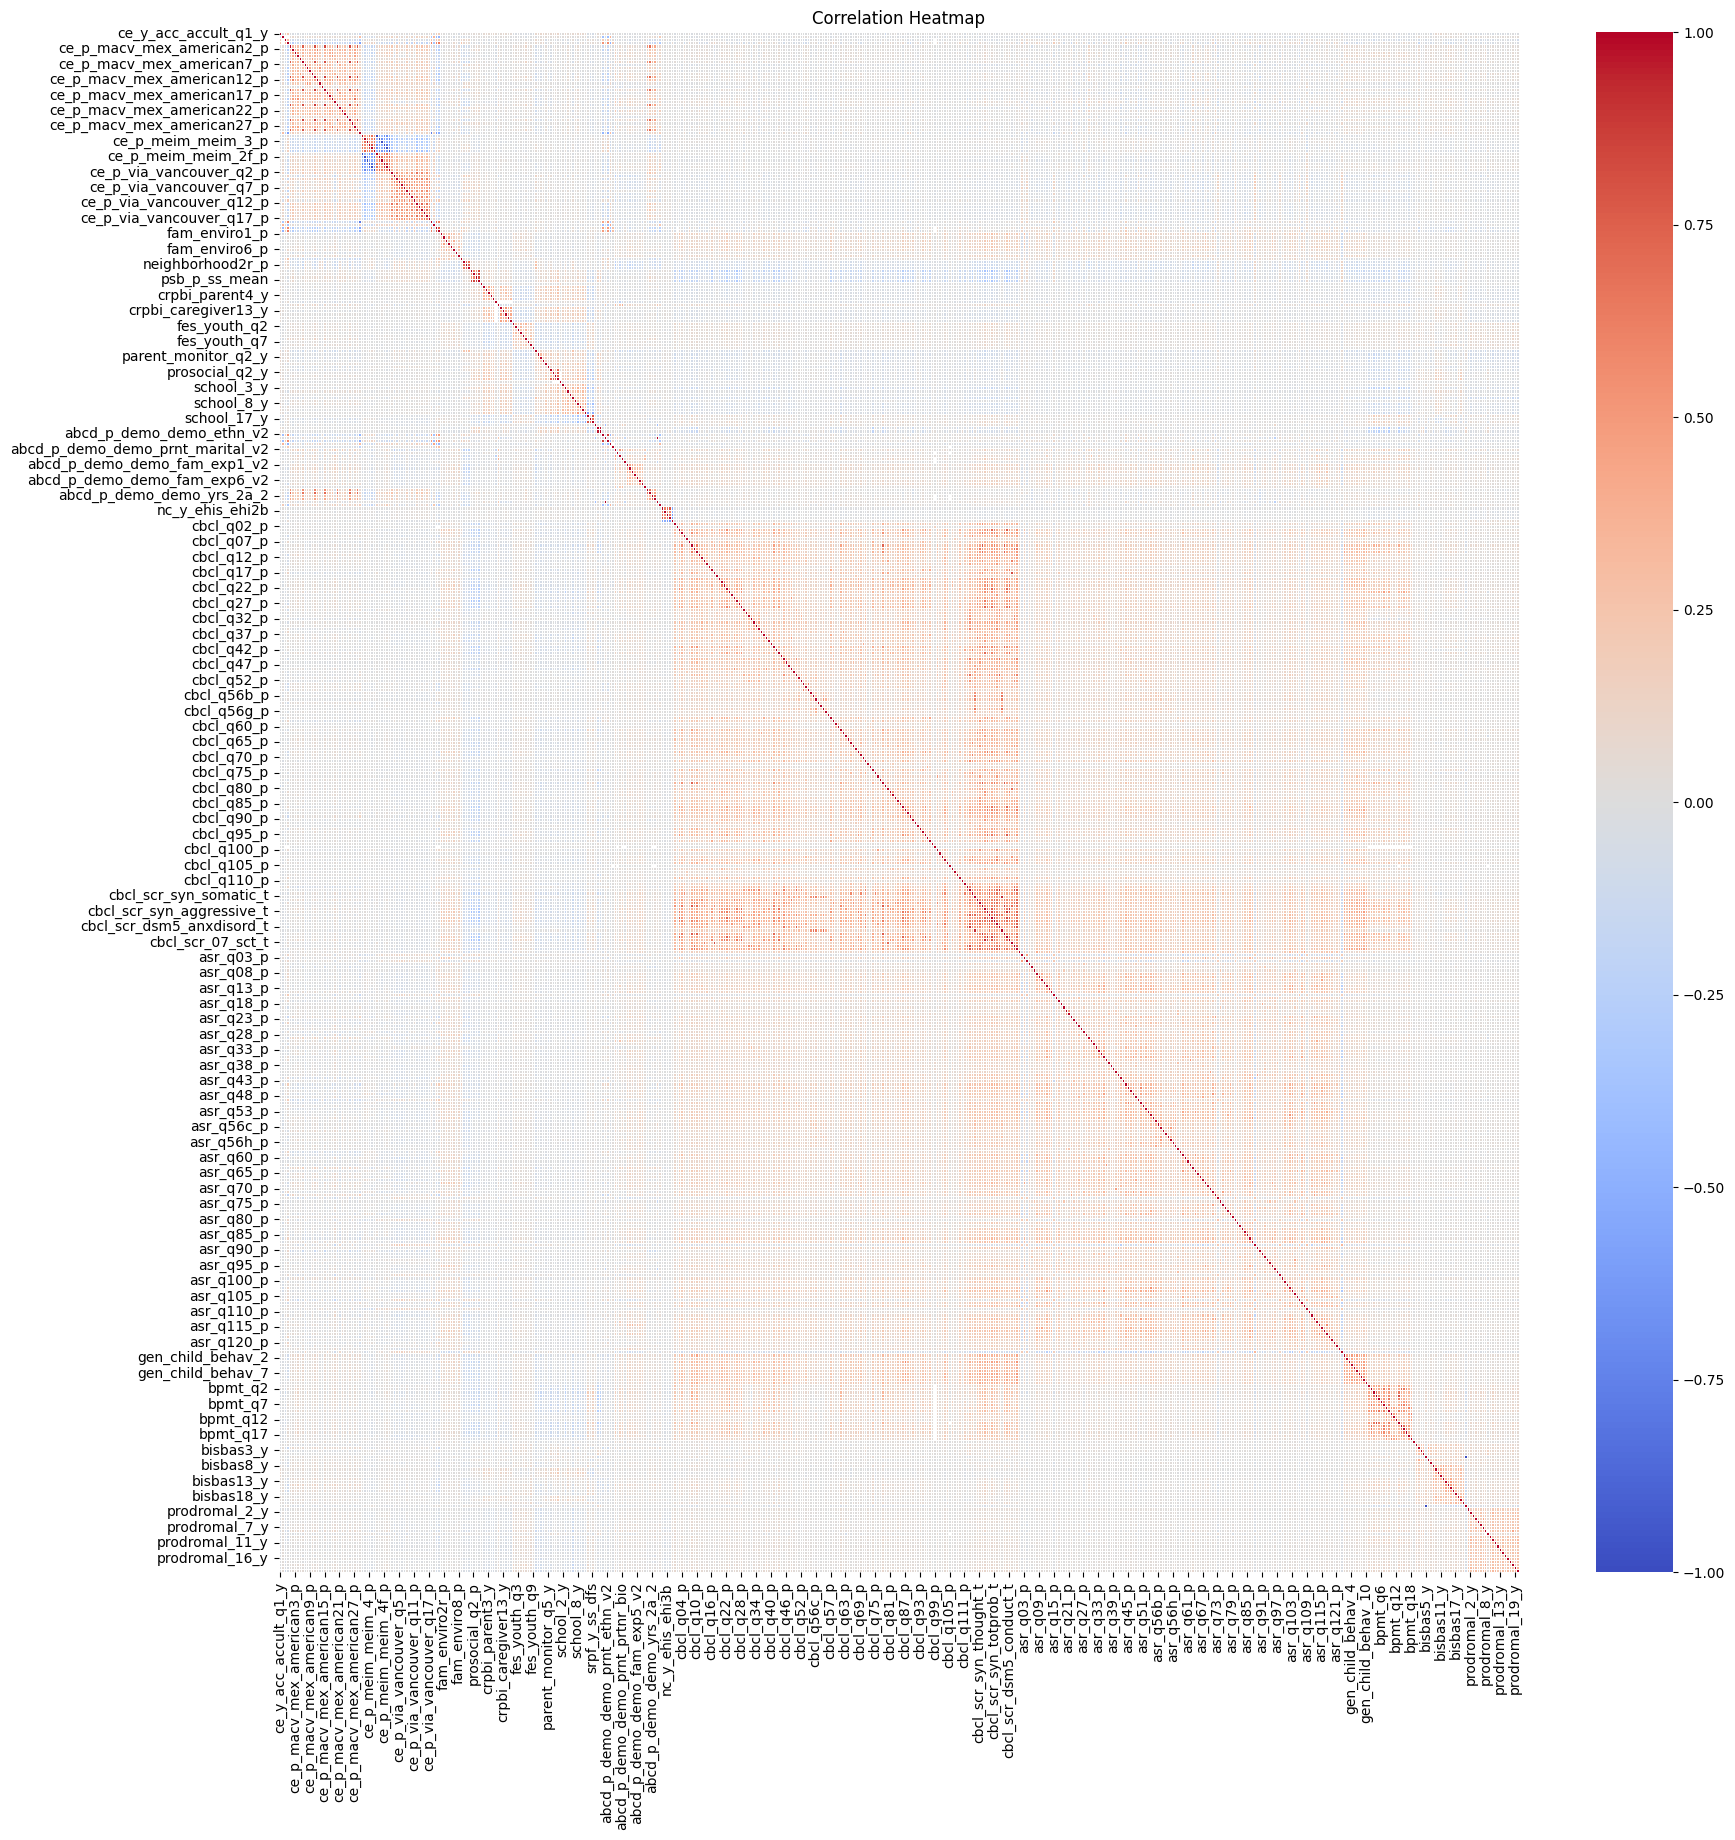

In [27]:
# Create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr.iloc[:500,:500], annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

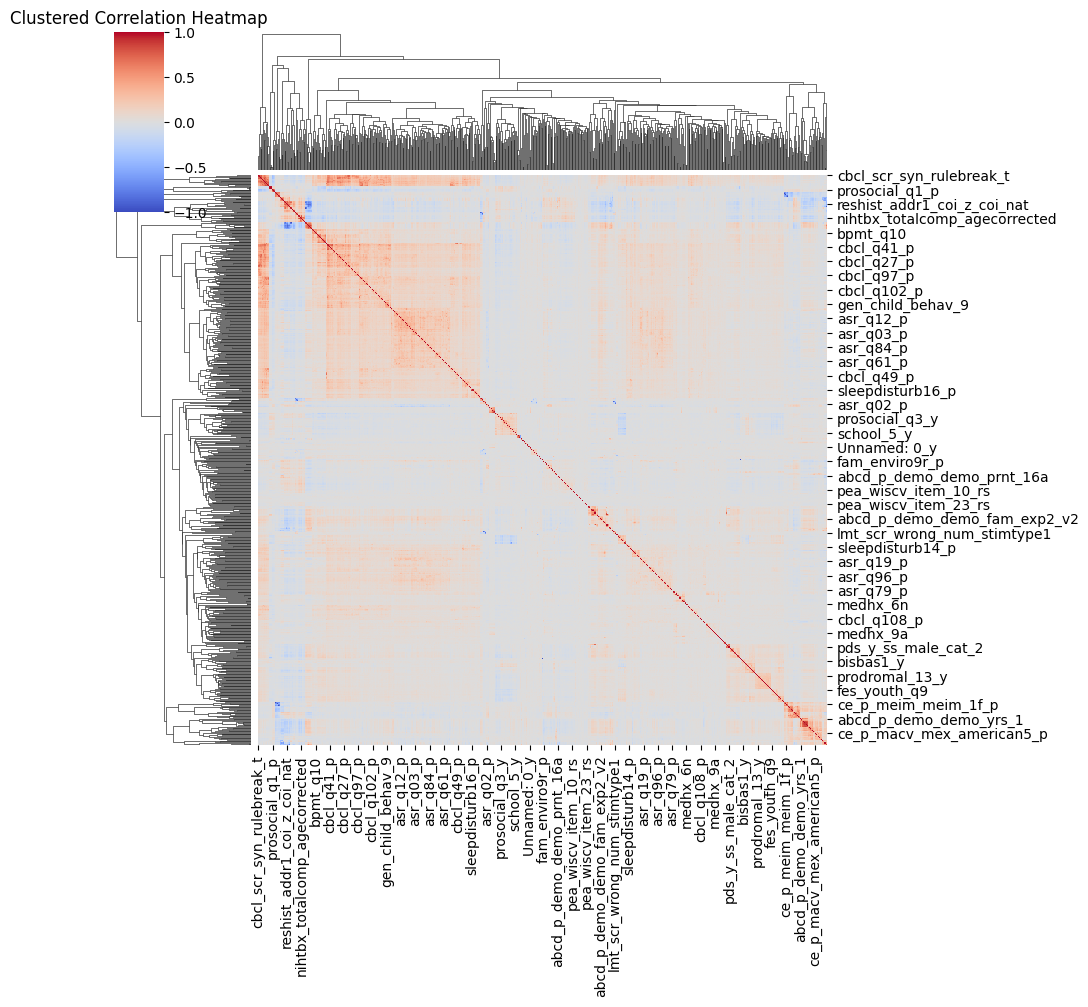

In [28]:
# Create a clustered heatmap
corr = corr.fillna(0)
sns.clustermap(corr, cmap='coolwarm', figsize=(10, 10))
plt.xticks([])
plt.title('Clustered Correlation Heatmap')
plt.show()

## Network graph 

In [33]:
import networkx as nx

In [29]:
# Drop duplicated columns 
df = merged_dfs[0]
df = df.loc[:, ~df.T.duplicated()]
print(merged_dfs[0].shape, df.shape)


(11868, 759) (11868, 759)


In [30]:
corr = df.corr()
corr = corr.fillna(0)
corr

ce_y_acc_accult_q1_y  ce_y_acc_accult_q2_y  \
ce_y_acc_accult_q1_y                   1.000000             -0.053433   
ce_y_acc_accult_q2_y                  -0.053433              1.000000   
ce_y_acc_accult_q4_y                   0.172884              0.000000   
ce_y_acc_accult_q5_y                   0.224792              0.000000   
ce_p_macv_mex_american1_p             -0.019571              0.039709   
...                                         ...                   ...   
nt_y_st_screen10_wknd_y                0.005085              0.023076   
nt_y_st_screen11_wknd_y                0.009003              0.001691   
nt_y_st_screen12_wknd_y                0.001559              0.024623   
nt_y_st_screen13_y                    -0.021226             -0.022854   
nt_y_st_screen14_y                    -0.035742              0.019662   

                           ce_y_acc_accult_q4_y  ce_y_acc_accult_q5_y  \
ce_y_acc_accult_q1_y                   0.172884              0.224792   
ce_y_acc_accult_q2_y                   0.000000              0.000000   
ce_y_acc_accult_q4_y                   1.000000              0.313634   
ce_y_acc_accult_q5_y                   0.313634              1.000000   
ce_p_macv_mex_american1_p             -0.099380             -0.174443   
...                                         ...                   ...   
nt_y_st_screen10_wknd_y               -0.051870             -0.003400   
nt_y_st_screen11_wknd_y               -0.037172              0.007900   
nt_y_st_screen12_wknd_y               -0.058549             -0.061127   
nt_y_st_screen13_y                    -0.043458             -0.009937   
nt_y_st_screen14_y                    -0.042345             -0.038530   

                           ce_p_macv_mex_american1_p  \
ce_y_acc_accult_q1_y                       -0.019571   
ce_y_acc_accult_q2_y                        0.039709   
ce_y_acc_accult_q4_y                       -0.099380   
ce_y_acc_accult_q5_y                       -0.174443   
ce_p_macv_mex_american1_p                   1.000000   
...                                              ...   
nt_y_st_screen10_wknd_y                     0.039382   
nt_y_st_screen11_wknd_y                     0.035983   
nt_y_st_screen12_wknd_y                     0.046335   
nt_y_st_screen13_y                          0.063551   
nt_y_st_screen14_y                          0.031109   

                           ce_p_macv_mex_american2_p  \
ce_y_acc_accult_q1_y                       -0.032780   
ce_y_acc_accult_q2_y                        0.078219   
ce_y_acc_accult_q4_y                       -0.109292   
ce_y_acc_accult_q5_y                       -0.264533   
ce_p_macv_mex_american1_p                   0.345020   
...                                              ...   
nt_y_st_screen10_wknd_y                     0.052448   
nt_y_st_screen11_wknd_y                     0.033939   
nt_y_st_screen12_wknd_y                     0.052484   
nt_y_st_screen13_y                          0.095876   
nt_y_st_screen14_y                          0.088527   

                           ce_p_macv_mex_american3_p  \
ce_y_acc_accult_q1_y                       -0.032980   
ce_y_acc_accult_q2_y                        0.051101   
ce_y_acc_accult_q4_y                       -0.058743   
ce_y_acc_accult_q5_y                       -0.143741   
ce_p_macv_mex_american1_p                   0.319582   
...                                              ...   
nt_y_st_screen10_wknd_y                     0.049723   
nt_y_st_screen11_wknd_y                     0.028165   
nt_y_st_screen12_wknd_y                     0.059768   
nt_y_st_screen13_y                          0.092169   
nt_y_st_screen14_y                          0.067928   

                           ce_p_macv_mex_american4_p  \
ce_y_acc_accult_q1_y                       -0.040710   
ce_y_acc_accult_q2_y                        0.036452   
ce_y_acc_accult_q4_y                       -0.066501   
ce_y_acc_accult_q5_y          

In [31]:
# # Create a long-form DataFrame of the correlations
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

# Filter links to keep only significant correlations and remove self-correlations
links_filtered = links[((links['value'] >= 0.3) | (links['value'] <= -0.3)) & (links['var1'] != links['var2'])]
links_filtered

var1                      var2     value
819     ce_y_acc_accult_q2_y      ce_p_acc_accult_q1_p -0.321524
820     ce_y_acc_accult_q2_y      ce_p_acc_accult_q2_p  0.347475
821     ce_y_acc_accult_q2_y      ce_p_acc_accult_q4_p -0.429291
822     ce_y_acc_accult_q2_y      ce_p_acc_accult_q5_p -0.462893
888     ce_y_acc_accult_q2_y  abcd_p_demo_demo_ethn_v2 -0.386015
...                      ...                       ...       ...
573740    nt_y_st_screen13_y                 pds_sex_y -0.312071
573794    nt_y_st_screen13_y    nt_y_st_screen3_wkdy_y  0.369958
573800    nt_y_st_screen13_y    nt_y_st_screen9_wknd_y  0.369198
573805    nt_y_st_screen13_y        nt_y_st_screen14_y  0.362404
574562    nt_y_st_screen14_y        nt_y_st_screen13_y  0.362404

[7458 rows x 3 columns]

In [34]:
# Create a graph from filtered links
G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2', edge_attr='value') # edge_attr=True

In [35]:
# Need to graph all of the variables under each individual csv file? to assign color 
files = csv_files_df[csv_files_df['Year'] == 0]["Description"].values
files

array(['ce_cult_0', 'ce_p_fes_0', 'ce_p_nsc_0', 'ce_p_psb_0',
       'ce_y_crpbi_0', 'ce_y_fes_0', 'ce_y_nsc_0', 'ce_y_pm_0',
       'ce_y_psb_0', 'ce_y_srpf_0', 'demo_agg_0', 'mh_cbclItems_0',
       'mh_cbclTscores_0', 'mh_p_asr_0', 'mh_p_gbi_0', 'mh_t_bpm_0',
       'mh_y_bisbas_0', 'mh_y_pps_0', 'mh_y_upps_0', 'nc_nonnihtbx_0',
       'nc_y_lmt_0', 'nc_y_nihtb_0', 'nc_y_wisc_0', 'ph_p_mhx_0',
       'ph_p_otbi_0', 'ph_p_pds_0', 'ph_p_sds_0', 'ph_sex_0',
       'ph_y_pds_0', 'static_fmhx_0', 'static_geog_0', 'stq_agg_0'],
      dtype=object)

In [57]:
vars1 = D_filtered[(D_filtered["Domain"] == "ce") & (D_filtered["Year"] == 0)]["variables"].values
vars1
#x = [string for file in vars1 for string in vars[file] if string != "src_subject_id"]
#x

array(['ce_y_acc_accult_q1_y', 'ce_y_acc_accult_q2_y',
       'ce_y_acc_accult_q4_y', 'ce_y_acc_accult_q5_y',
       'ce_p_macv_mex_american1_p', 'ce_p_macv_mex_american2_p',
       'ce_p_macv_mex_american3_p', 'ce_p_macv_mex_american4_p',
       'ce_p_macv_mex_american5_p', 'ce_p_macv_mex_american6_p',
       'ce_p_macv_mex_american7_p', 'ce_p_macv_mex_american8_p',
       'ce_p_macv_mex_american9_p', 'ce_p_macv_mex_american10_p',
       'ce_p_macv_mex_american11_p', 'ce_p_macv_mex_american12_p',
       'ce_p_macv_mex_american13_p', 'ce_p_macv_mex_american14_p',
       'ce_p_macv_mex_american15_p', 'ce_p_macv_mex_american16_p',
       'ce_p_macv_mex_american17_p', 'ce_p_macv_mex_american18_p',
       'ce_p_macv_mex_american19_p', 'ce_p_macv_mex_american20_p',
       'ce_p_macv_mex_american21_p', 'ce_p_macv_mex_american22_p',
       'ce_p_macv_mex_american23_p', 'ce_p_macv_mex_american24_p',
       'ce_p_macv_mex_american25_p', 'ce_p_macv_mex_american26_p',
       'ce_p_macv_mex_americ

In [60]:
# Color assign of variables to domains
G_nodes = list(G.nodes())

node_groups = {}
for group in D_filtered["Domain"].unique():
    vars1 = D_filtered[(D_filtered["Domain"] == group) & (D_filtered["Year"] == 0)]["variables"].values
    
    #x = [string for file in vars1 for string in vars[file] if string != "src_subject_id"]
    node_groups[group] = [item for item in vars1 if item in G_nodes] # filtered list, only keep variables that exist in G 
node_groups


{'ce': ['ce_y_acc_accult_q2_y',
  'ce_y_acc_accult_q4_y',
  'ce_y_acc_accult_q5_y',
  'ce_p_macv_mex_american1_p',
  'ce_p_macv_mex_american2_p',
  'ce_p_macv_mex_american3_p',
  'ce_p_macv_mex_american4_p',
  'ce_p_macv_mex_american5_p',
  'ce_p_macv_mex_american6_p',
  'ce_p_macv_mex_american7_p',
  'ce_p_macv_mex_american8_p',
  'ce_p_macv_mex_american9_p',
  'ce_p_macv_mex_american10_p',
  'ce_p_macv_mex_american11_p',
  'ce_p_macv_mex_american12_p',
  'ce_p_macv_mex_american13_p',
  'ce_p_macv_mex_american14_p',
  'ce_p_macv_mex_american15_p',
  'ce_p_macv_mex_american16_p',
  'ce_p_macv_mex_american17_p',
  'ce_p_macv_mex_american18_p',
  'ce_p_macv_mex_american19_p',
  'ce_p_macv_mex_american20_p',
  'ce_p_macv_mex_american21_p',
  'ce_p_macv_mex_american22_p',
  'ce_p_macv_mex_american23_p',
  'ce_p_macv_mex_american24_p',
  'ce_p_macv_mex_american25_p',
  'ce_p_macv_mex_american26_p',
  'ce_p_macv_mex_american27_p',
  'ce_p_macv_mex_american28_p',
  'ce_p_macv_mex_american_sel

In [61]:
node_groups.keys()

dict_keys(['ce', 'demo', 'mh', 'nc', 'ph', 'static', 'stq'])

In [62]:
color_map = {
    'ce': 'blue', 
    'demo': 'brown', 
    'mh': 'purple',
    'nc': 'orange',
    'ph': 'pink',
    'static': 'cyan',
    'stq': 'yellow'
}

data = [(group, node, color_map[group]) for group, nodes in node_groups.items() for node in nodes]

df = pd.DataFrame(data, columns = ["Group", "Node", "Color"])
df

Group                       Node   Color
0      ce       ce_y_acc_accult_q2_y    blue
1      ce       ce_y_acc_accult_q4_y    blue
2      ce       ce_y_acc_accult_q5_y    blue
3      ce  ce_p_macv_mex_american1_p    blue
4      ce  ce_p_macv_mex_american2_p    blue
..    ...                        ...     ...
610   stq    nt_y_st_screen10_wknd_y  yellow
611   stq    nt_y_st_screen11_wknd_y  yellow
612   stq    nt_y_st_screen12_wknd_y  yellow
613   stq         nt_y_st_screen13_y  yellow
614   stq         nt_y_st_screen14_y  yellow

[615 rows x 3 columns]

In [63]:
df["Color"].unique()

array(['blue', 'brown', 'purple', 'orange', 'pink', 'cyan', 'yellow'],
      dtype=object)

In [75]:
# Assign colors to nodes
node_colors = []
for node in G.nodes():
    for group, nodes in node_groups.items():
        if node in nodes:
            node_colors.append(color_map[group])
            break
    else:
        print(group, nodes)
        node_colors.append('gray')  # Default color for nodes not in any group

stq ['nt_p_stq_screentime_p_select_language', 'nt_y_st_screen1_wkdy_y', 'nt_y_st_screen2_wkdy_y', 'nt_y_st_screen3_wkdy_y', 'nt_y_st_screen4_wkdy_y', 'nt_y_st_screen5_wkdy_y', 'nt_y_st_screen_wkdy_y', 'nt_y_st_screen7_wknd_y', 'nt_y_st_screen8_wknd_y', 'nt_y_st_screen9_wknd_y', 'nt_y_st_screen10_wknd_y', 'nt_y_st_screen11_wknd_y', 'nt_y_st_screen12_wknd_y', 'nt_y_st_screen13_y', 'nt_y_st_screen14_y']
stq ['nt_p_stq_screentime_p_select_language', 'nt_y_st_screen1_wkdy_y', 'nt_y_st_screen2_wkdy_y', 'nt_y_st_screen3_wkdy_y', 'nt_y_st_screen4_wkdy_y', 'nt_y_st_screen5_wkdy_y', 'nt_y_st_screen_wkdy_y', 'nt_y_st_screen7_wknd_y', 'nt_y_st_screen8_wknd_y', 'nt_y_st_screen9_wknd_y', 'nt_y_st_screen10_wknd_y', 'nt_y_st_screen11_wknd_y', 'nt_y_st_screen12_wknd_y', 'nt_y_st_screen13_y', 'nt_y_st_screen14_y']


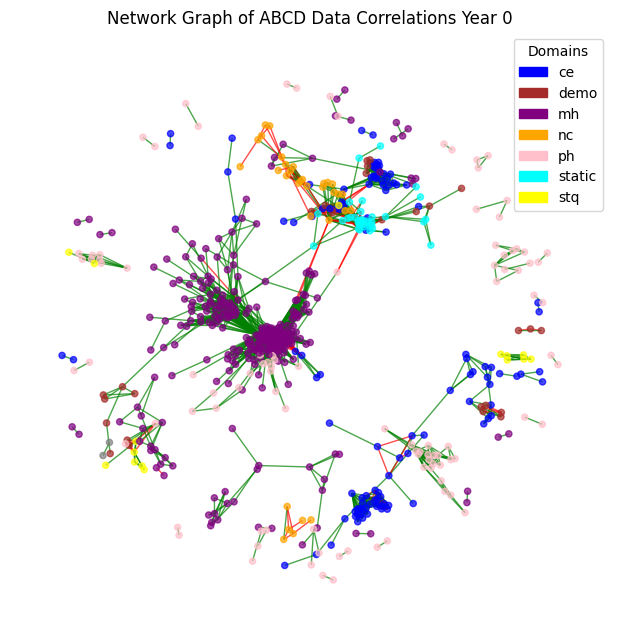

In [76]:
from matplotlib.patches import Patch

plt.figure(figsize=(6,6))  # Set the figure size (width, height) in inches

# Create the graph
pos = nx.spring_layout(G, k=0.1, seed = 42)  # positions for all nodes

# Edge colors
edge_colors = ['green' if G[u][v]['value'] > 0 else 'red' for u, v in G.edges()]

nx.draw(G, pos, with_labels=False, node_size=20, node_color=node_colors, edge_color=edge_colors, alpha=0.7) # edge_color = 'gray'

# Create legend handles
legend_handles = [Patch(color=color, label=group) for group, color in color_map.items()]

# Add legend to the plot
plt.legend(handles=legend_handles, loc='best', title='Domains')
plt.title('Network Graph of ABCD Data Correlations Year 0')
plt.show()

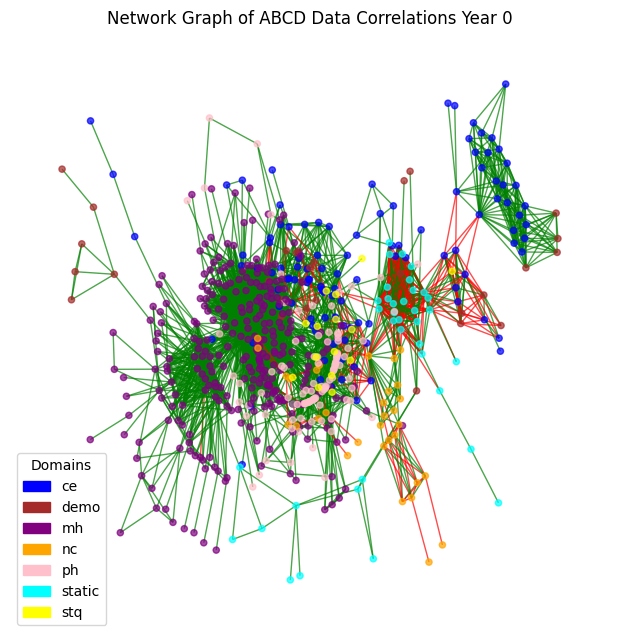

In [77]:
from matplotlib.patches import Patch

plt.figure(figsize=(6,6))  # Set the figure size (width, height) in inches

# Create the graph
pos = nx.kamada_kawai_layout(G)  # positions for all nodes

# Edge colors
edge_colors = ['green' if G[u][v]['value'] > 0 else 'red' for u, v in G.edges()]

nx.draw(G, pos, with_labels=False, node_size=20, node_color=node_colors, edge_color=edge_colors, alpha=0.7) # edge_color = 'gray'

# Create legend handles
legend_handles = [Patch(color=color, label=group) for group, color in color_map.items()]

# Add legend to the plot
plt.legend(handles=legend_handles, loc='best', title='Domains')
plt.title('Network Graph of ABCD Data Correlations Year 0')
plt.show()

In [78]:
ordered_nodes = [node for group in node_groups.values() for node in group]
pos = nx.circular_layout(G)  # positions for all nodes
ordered_dict = {key: pos[key] for key in ordered_nodes if key in pos}
for key in pos:
    if key not in ordered_dict:
        ordered_dict[key] = pos[key]

node_colors = []
for node in ordered_dict.keys():
    for group, nodes in node_groups.items():
        if node in nodes:
            node_colors.append(color_map[group])
            break
    else:
        print(group, nodes)
        node_colors.append('gray')  # Default color for nodes not in any group
node_colors

stq ['nt_p_stq_screentime_p_select_language', 'nt_y_st_screen1_wkdy_y', 'nt_y_st_screen2_wkdy_y', 'nt_y_st_screen3_wkdy_y', 'nt_y_st_screen4_wkdy_y', 'nt_y_st_screen5_wkdy_y', 'nt_y_st_screen_wkdy_y', 'nt_y_st_screen7_wknd_y', 'nt_y_st_screen8_wknd_y', 'nt_y_st_screen9_wknd_y', 'nt_y_st_screen10_wknd_y', 'nt_y_st_screen11_wknd_y', 'nt_y_st_screen12_wknd_y', 'nt_y_st_screen13_y', 'nt_y_st_screen14_y']
stq ['nt_p_stq_screentime_p_select_language', 'nt_y_st_screen1_wkdy_y', 'nt_y_st_screen2_wkdy_y', 'nt_y_st_screen3_wkdy_y', 'nt_y_st_screen4_wkdy_y', 'nt_y_st_screen5_wkdy_y', 'nt_y_st_screen_wkdy_y', 'nt_y_st_screen7_wknd_y', 'nt_y_st_screen8_wknd_y', 'nt_y_st_screen9_wknd_y', 'nt_y_st_screen10_wknd_y', 'nt_y_st_screen11_wknd_y', 'nt_y_st_screen12_wknd_y', 'nt_y_st_screen13_y', 'nt_y_st_screen14_y']


['blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 

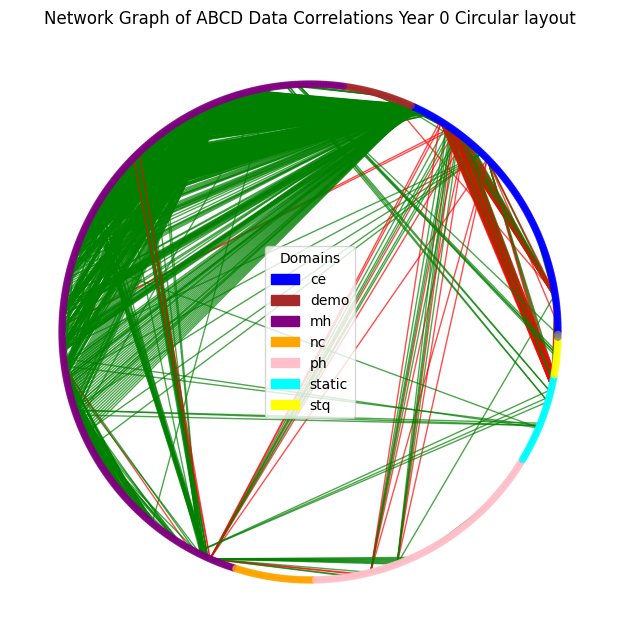

In [79]:
from matplotlib.patches import Patch

plt.figure(figsize=(6,6))  # Set the figure size (width, height) in inches

# Edge colors
edge_colors = ['green' if G[u][v]['value'] > 0 else 'red' for u, v in G.edges()]

nx.draw(G, ordered_dict, with_labels=False, node_size=20, node_color=node_colors, edge_color=edge_colors, alpha=0.7) # edge_color = 'gray'

# Create legend handles
legend_handles = [Patch(color=color, label=group) for group, color in color_map.items()]

# Add legend to the plot
plt.legend(handles=legend_handles, loc='best', title='Domains')
plt.title('Network Graph of ABCD Data Correlations Year 0 Circular layout')
plt.show()

## TSNE

In [81]:
merged_dfs[0].columns

Index(['src_subject_id', 'ce_y_acc_accult_q1_y', 'ce_y_acc_accult_q2_y',
       'ce_y_acc_accult_q4_y', 'ce_y_acc_accult_q5_y',
       'ce_p_macv_mex_american1_p', 'ce_p_macv_mex_american2_p',
       'ce_p_macv_mex_american3_p', 'ce_p_macv_mex_american4_p',
       'ce_p_macv_mex_american5_p',
       ...
       'nt_y_st_screen5_wkdy_y', 'nt_y_st_screen_wkdy_y',
       'nt_y_st_screen7_wknd_y', 'nt_y_st_screen8_wknd_y',
       'nt_y_st_screen9_wknd_y', 'nt_y_st_screen10_wknd_y',
       'nt_y_st_screen11_wknd_y', 'nt_y_st_screen12_wknd_y',
       'nt_y_st_screen13_y', 'nt_y_st_screen14_y'],
      dtype='object', length=759)

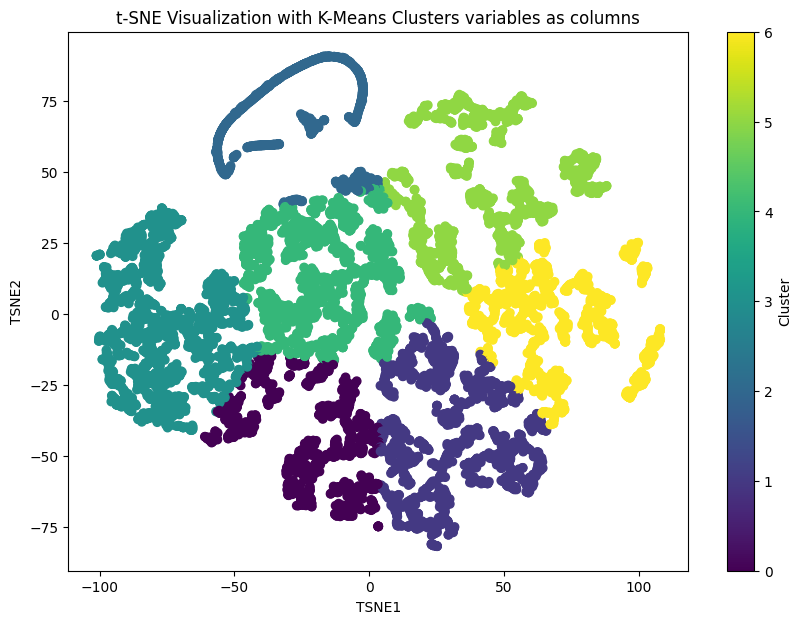

In [97]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

df = merged_dfs[0].drop(columns = ["src_subject_id"])
df = df.fillna(0)

# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)

# Fit and transform the data
tsne_results = tsne.fit_transform(df)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

# Initialize K-Means with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)

# Fit and predict the clusters
clusters = kmeans.fit_predict(tsne_df)

# Add the cluster labels to the t-SNE DataFrame
tsne_df['Cluster'] = clusters

# Plot the t-SNE results with cluster labels
plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['Cluster'], cmap='viridis')
plt.title('t-SNE Visualization with K-Means Clusters variables as columns')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar(scatter, label='Cluster')
plt.show()

## UMAP

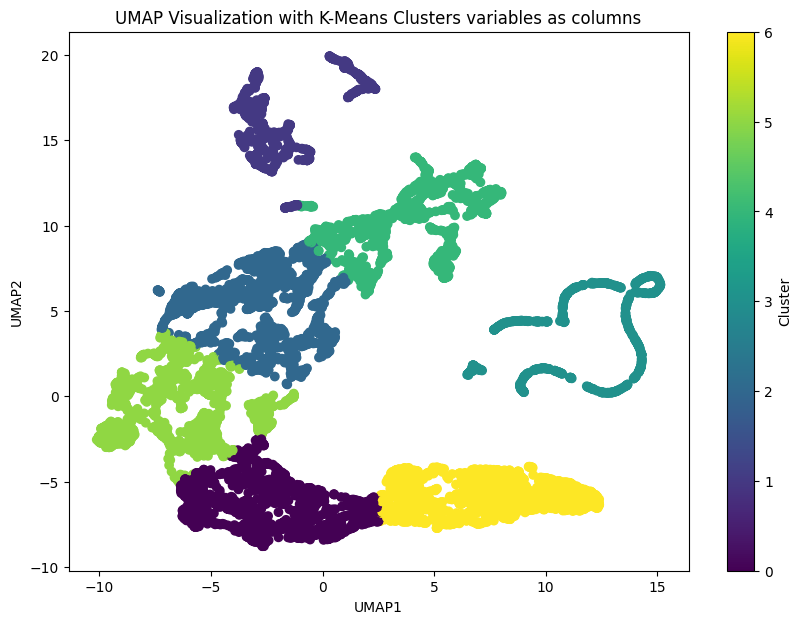

In [99]:
import umap
from sklearn.cluster import KMeans

df = merged_dfs[0].drop(columns = ["src_subject_id"])

df = df.fillna(0)

#df_transpose = df.T

# Initialize UMAP with desired parameters
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the data
umap_results = reducer.fit_transform(df)

# Create a DataFrame with the UMAP results
umap_df = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2'])

# Initialize K-Means with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)

# Fit and predict the clusters
clusters = kmeans.fit_predict(umap_df)

# Add the cluster labels to the UMAP DataFrame
umap_df['Cluster'] = clusters

# Plot the UMAP results with cluster labels
plt.figure(figsize=(10, 7))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df['Cluster'], cmap='viridis')
plt.title('UMAP Visualization with K-Means Clusters variables as columns')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar(scatter, label='Cluster')
plt.show()

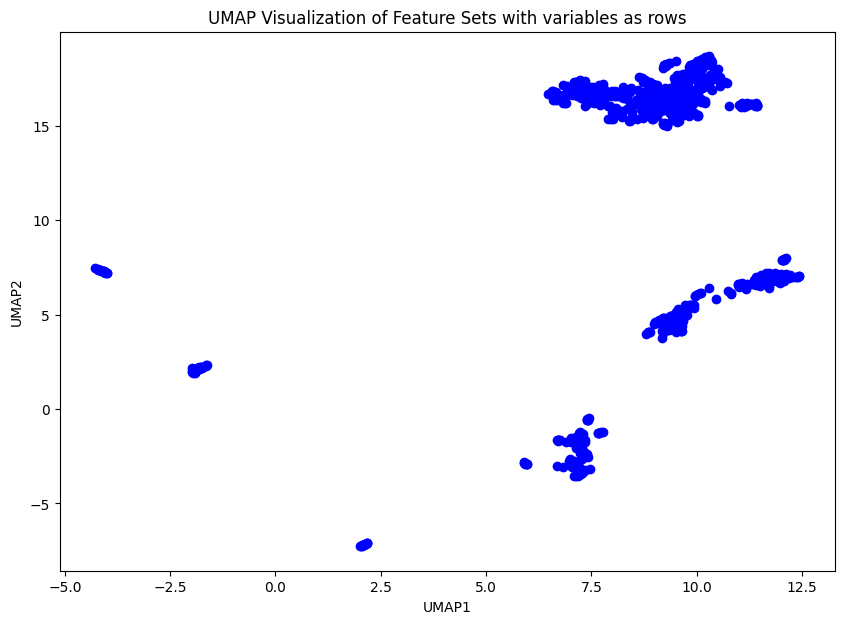

In [101]:
import umap
from sklearn.cluster import KMeans

df = merged_dfs[0].drop(columns = ["src_subject_id"])
df = df.fillna(0)

new_row = [col.split('_')[0] for col in df.columns]
new_row_df = pd.DataFrame([new_row], columns=df.columns)
df_with_new_row = pd.concat([new_row_df, df], ignore_index=True)

# Separate the new row from the rest of the data
feature_labels = df_with_new_row.iloc[0]
data = df_with_new_row.iloc[1:]

# Transpose the DataFrame so that features become rows
data_transposed = data.T

# Initialize UMAP with desired parameters
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the transposed data
umap_results = reducer.fit_transform(data_transposed)

# Create a DataFrame with the UMAP results
umap_df = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2'])
umap_df['Feature'] = feature_labels.values


# Plot the UMAP results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c='blue')
#for i, feature in enumerate(umap_df['Feature']):
#    plt.text(umap_df['UMAP1'][i], umap_df['UMAP2'][i], feature)
plt.title('UMAP Visualization of Feature Sets with variables as rows')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()


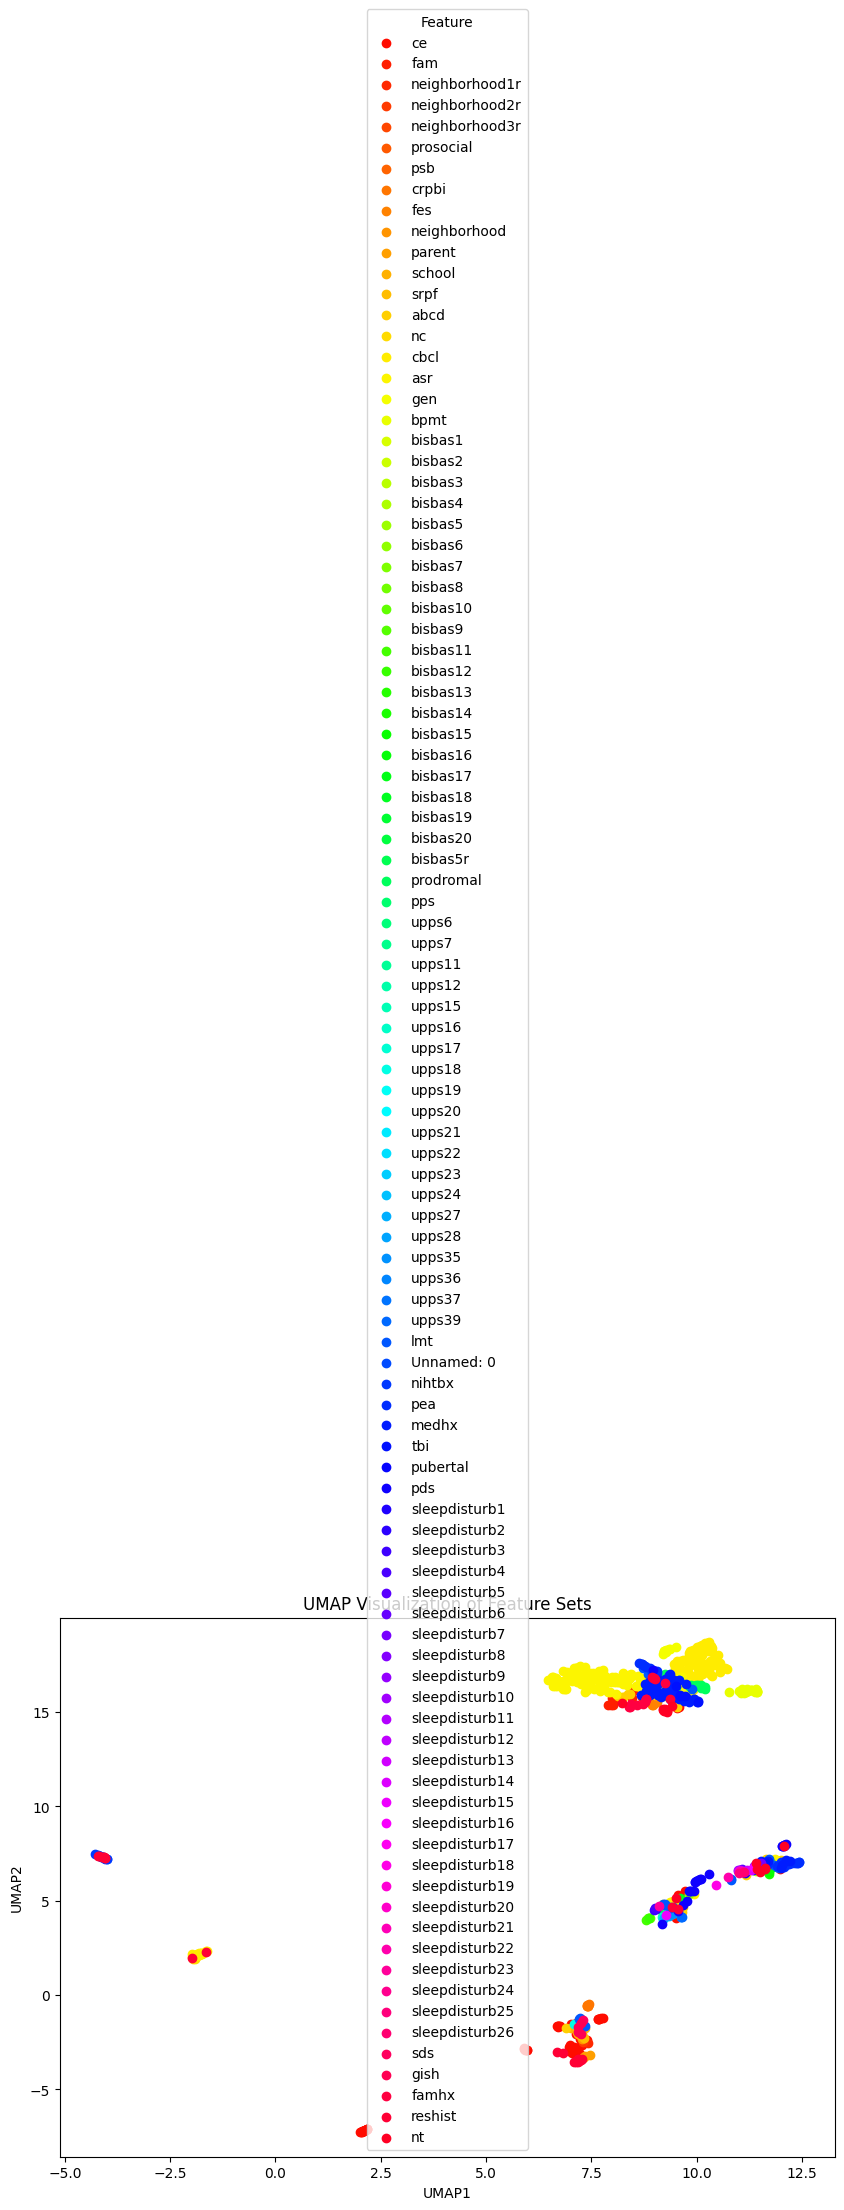

In [96]:
import umap
from sklearn.cluster import KMeans

df = merged_dfs[0].drop(columns = ["src_subject_id"])
df = df.fillna(0)

new_row = [col.split('_')[0] for col in df.columns]
new_row_df = pd.DataFrame([new_row], columns=df.columns)
df_with_new_row = pd.concat([new_row_df, df], ignore_index=True)

# Separate the new row from the rest of the data
feature_labels = df_with_new_row.iloc[0]
data = df_with_new_row.iloc[1:]

# Transpose the DataFrame so that features become rows
data_transposed = data.T

# Initialize UMAP with desired parameters
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the transposed data
umap_results = reducer.fit_transform(data_transposed)

# Create a DataFrame with the UMAP results
umap_df = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2'])
umap_df['Feature'] = feature_labels.values

# Use seaborn to get a color palette
palette = sns.color_palette("hsv", len(umap_df['Feature'].unique()))

# Create a dictionary to map features to colors
feature_colors = {feature: palette[i] for i, feature in enumerate(umap_df['Feature'].unique())}

# Plot the UMAP results with different colors for each feature
plt.figure(figsize=(10, 7))
for feature in umap_df['Feature'].unique():
    subset = umap_df[umap_df['Feature'] == feature]
    plt.scatter(subset['UMAP1'], subset['UMAP2'], label=feature, color=feature_colors[feature])
plt.title('UMAP Visualization of Feature Sets')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Feature')
plt.show()
